In [1]:
from video import hazard_detection as hd
from importlib import reload
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import os
import numpy as np 
from video.reader import VideoReader
from video import videolike as vdl
import cv2 as cv
import acquire as ac

Problem description.  We have the zero crossing function:
```python
def find_zero_crossings(lightness_difference: np.array, threshold:float = 0.01):
    ''' 
    returns an array of indexes in the lightness difference
    where the element changes the sign
    
    '''
    ld = lightness_difference.copy()
    ld = np.where(np.absolute(ld) < threshold, 
                                    0, ld)
    return np.where(np.diff(np.sign(ld)))[0] + 1
``` 
This function supposed to be less sensitive when the threshold is higher, and more sensitive when the threshold is lower. When we applied the function, it worked opposite. I'll go through all videos once again to check how every change in the lightness affects the graph.

In [37]:
directory1 = 'safe_videos/'
directory2 = 'videos/'
filenames1 = [directory1 + f for f in os.listdir('safe_videos') if os.path.isfile(os.path.join(directory1, f))]
filenames2 = [directory2+ f for f in os.listdir('videos') if os.path.isfile(os.path.join(directory2, f))]
filenames = filenames1 + filenames2

In [38]:
filenames

['safe_videos/LION MENTALITY - Motivational Video.mp4',
 'safe_videos/Motivational short video - How to succeed - cartoon.mp4',
 'safe_videos/I Will Guess Your Name In One Minute!.mp4',
 'safe_videos/hitched - 2 Minute Short Film.mp4',
 'safe_videos/THE SEED  Inspirational Short Film.mp4',
 'safe_videos/Disney Pixar Piper - Music by lewisjackmusic.mp4',
 'safe_videos/10 DAKİKADA BAZLAMA🔊İSTER KAHVALTIDA🔝İSTER ÇAY SAATİNDE🔝İSTER YEMEK YANINDA YE✌️YOK BÖYLE YUMUŞAKLIK.mp4',
 'safe_videos/Funniest Cat Videos Compilation in 2 Minute.mp4',
 'safe_videos/Best Short Motivational Speech Video - 24 HOURS - 1-Minute Motivation 2.mp4',
 'safe_videos/Cute Minutes - Two Minutes Funny Puppy Videos Compilation 1  FeenZoo.mp4',
 'videos/Color Flash.mp4',
 'videos/Paparazzi flashes.mp4',
 'videos/Delete & Killshot - Disco Weapon [Epilepsy Warning].mp4',
 'videos/Blue Green Flash.mp4',
 'videos/little hens and dog.mp4',
 'videos/Red Spin.mp4',
 'videos/Banned Pokemon Seizure Scene.mp4',
 'videos/Superma

Video safe_videos/LION MENTALITY - Motivational Video.mp4 FPS: 25


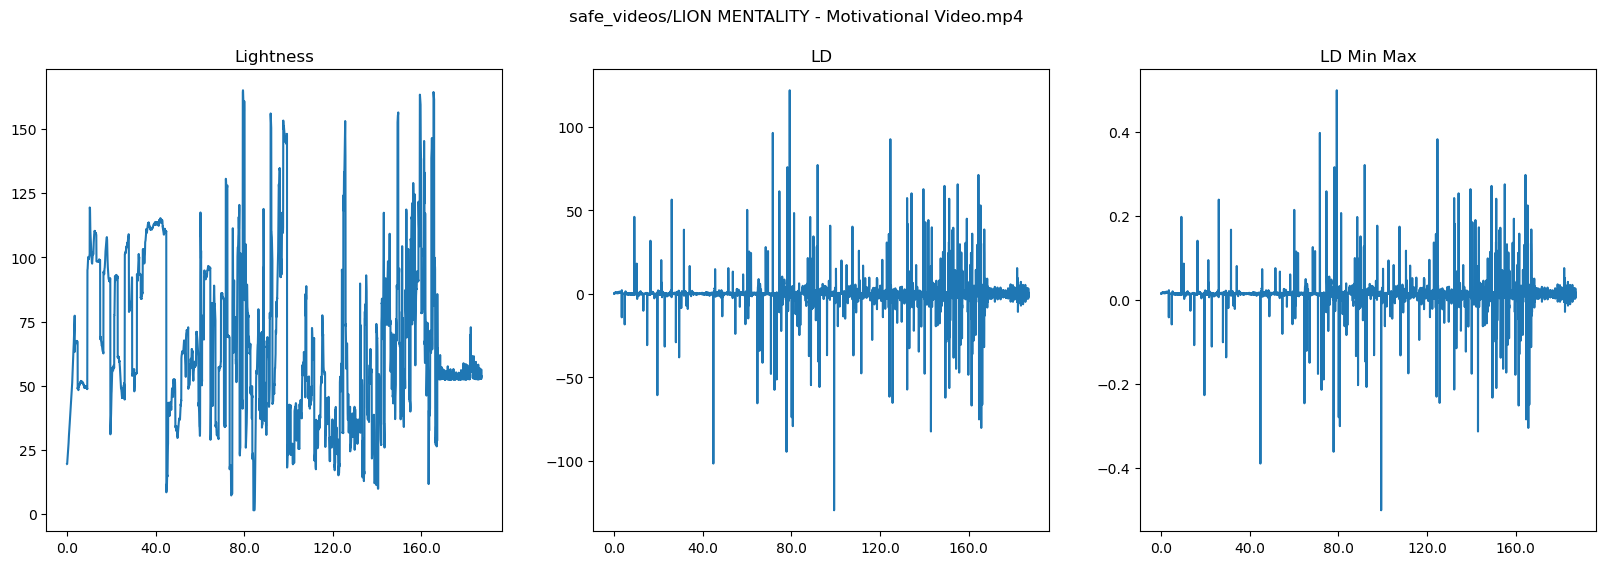

Video safe_videos/Motivational short video - How to succeed - cartoon.mp4 FPS: 30


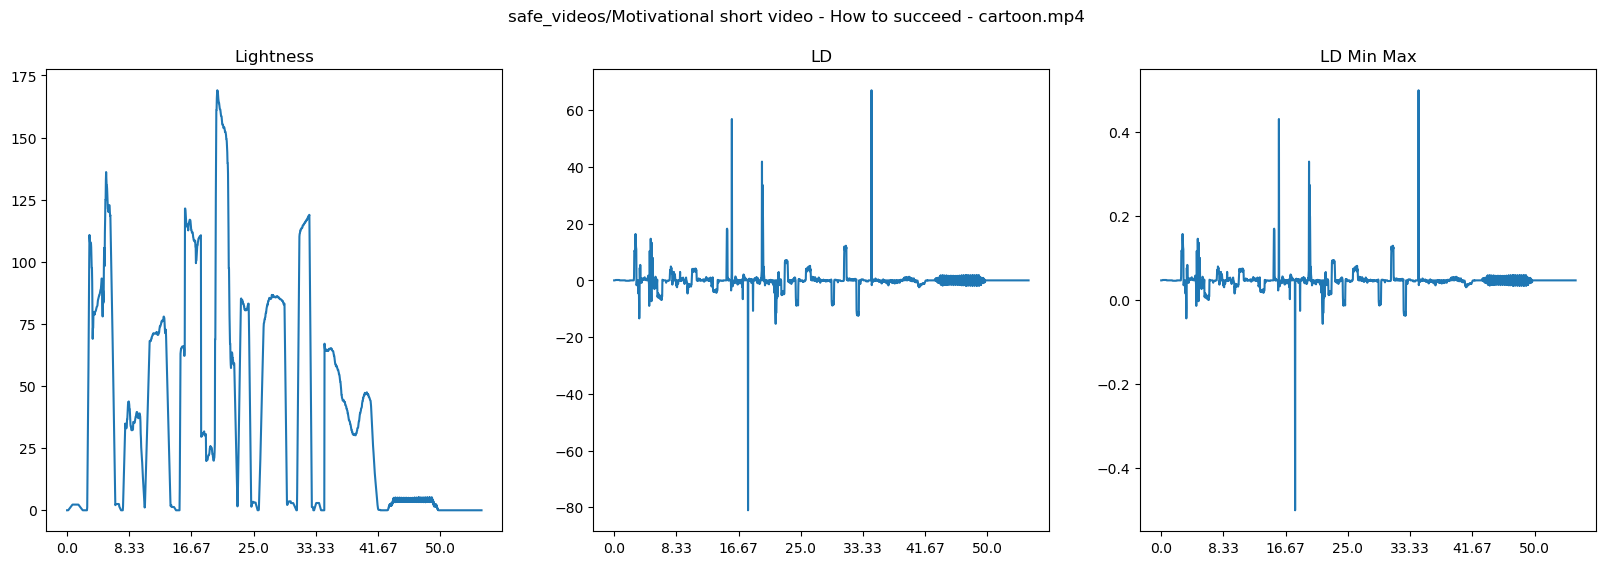

Video safe_videos/I Will Guess Your Name In One Minute!.mp4 FPS: 30


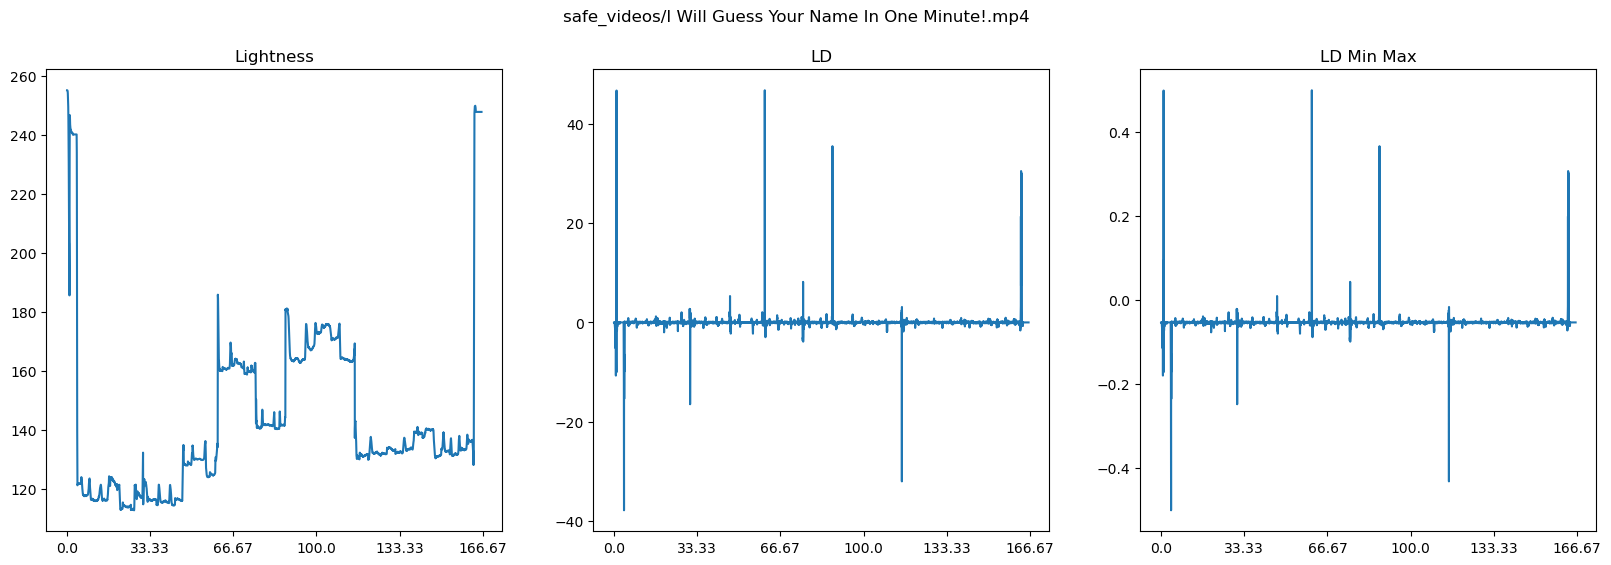

Video safe_videos/hitched - 2 Minute Short Film.mp4 FPS: 24


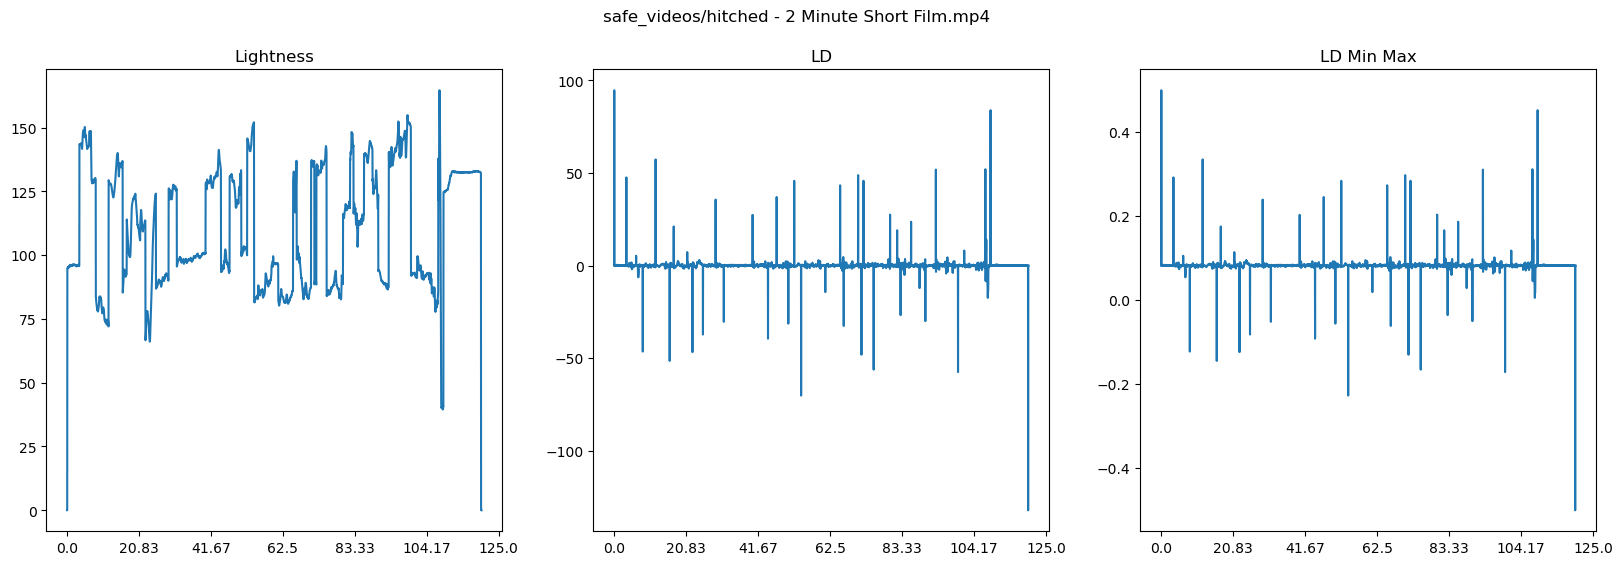

Video safe_videos/THE SEED  Inspirational Short Film.mp4 FPS: 24


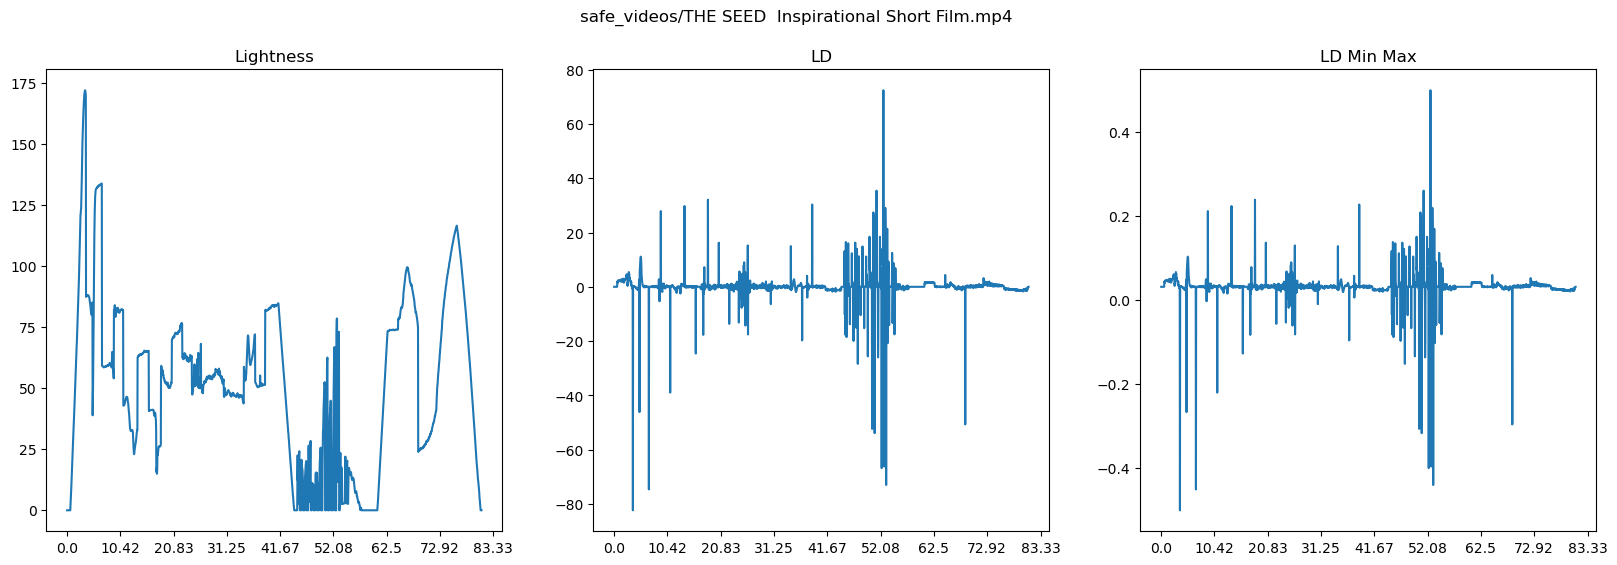

Video safe_videos/Disney Pixar Piper - Music by lewisjackmusic.mp4 FPS: 24


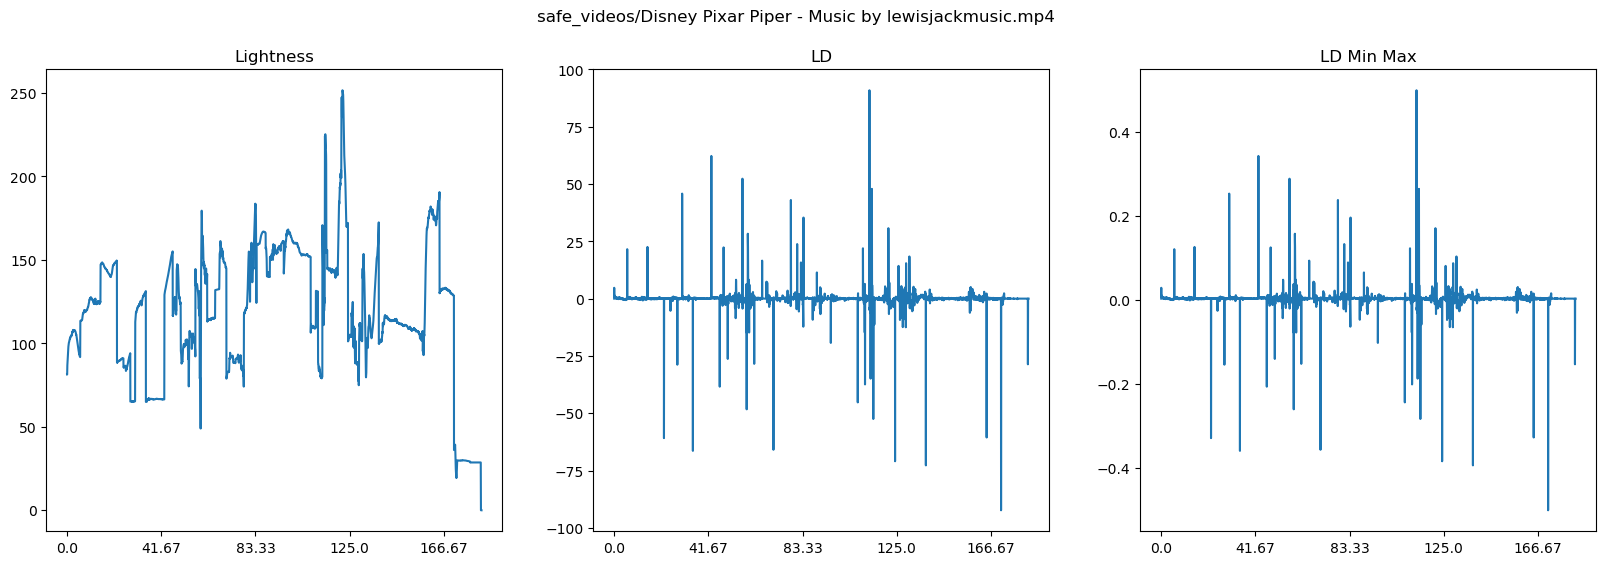

Video safe_videos/10 DAKİKADA BAZLAMA🔊İSTER KAHVALTIDA🔝İSTER ÇAY SAATİNDE🔝İSTER YEMEK YANINDA YE✌️YOK BÖYLE YUMUŞAKLIK.mp4 FPS: 30


/usr/local/Caskroom/mambaforge/base/envs/epilator/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/Caskroom/mambaforge/base/envs/epilator/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


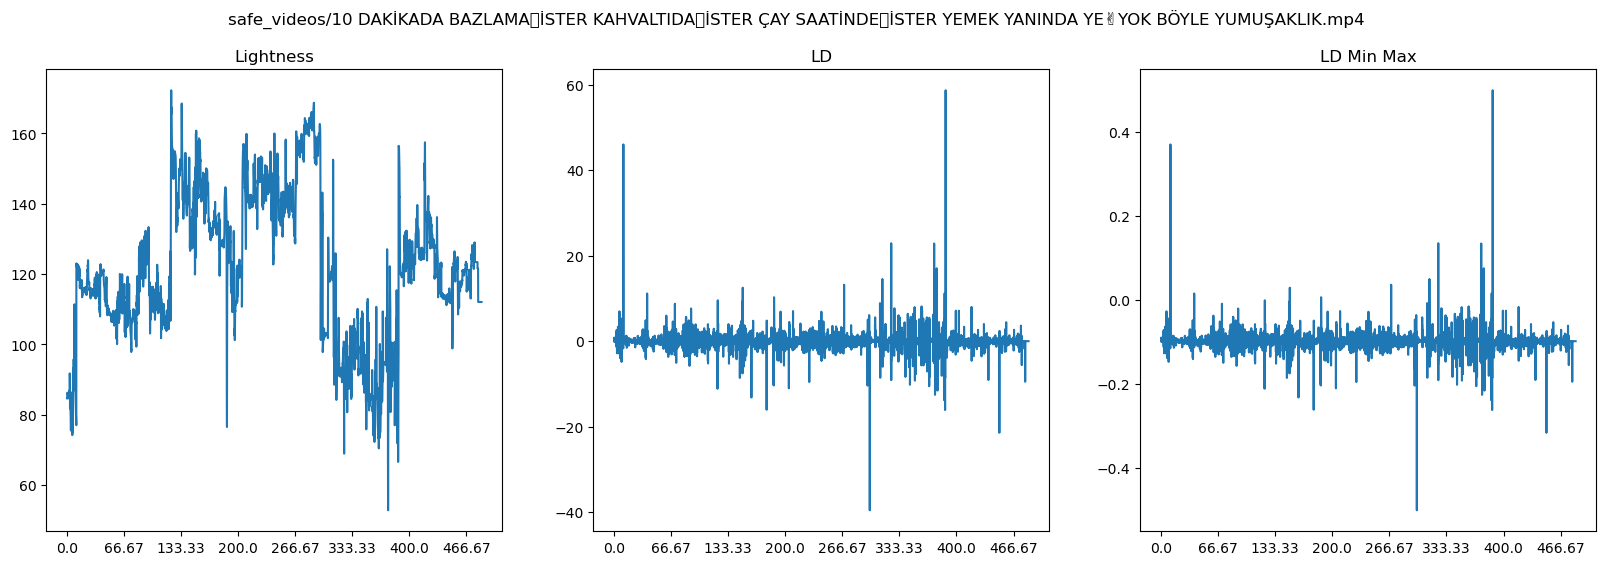

Video safe_videos/Funniest Cat Videos Compilation in 2 Minute.mp4 FPS: 25


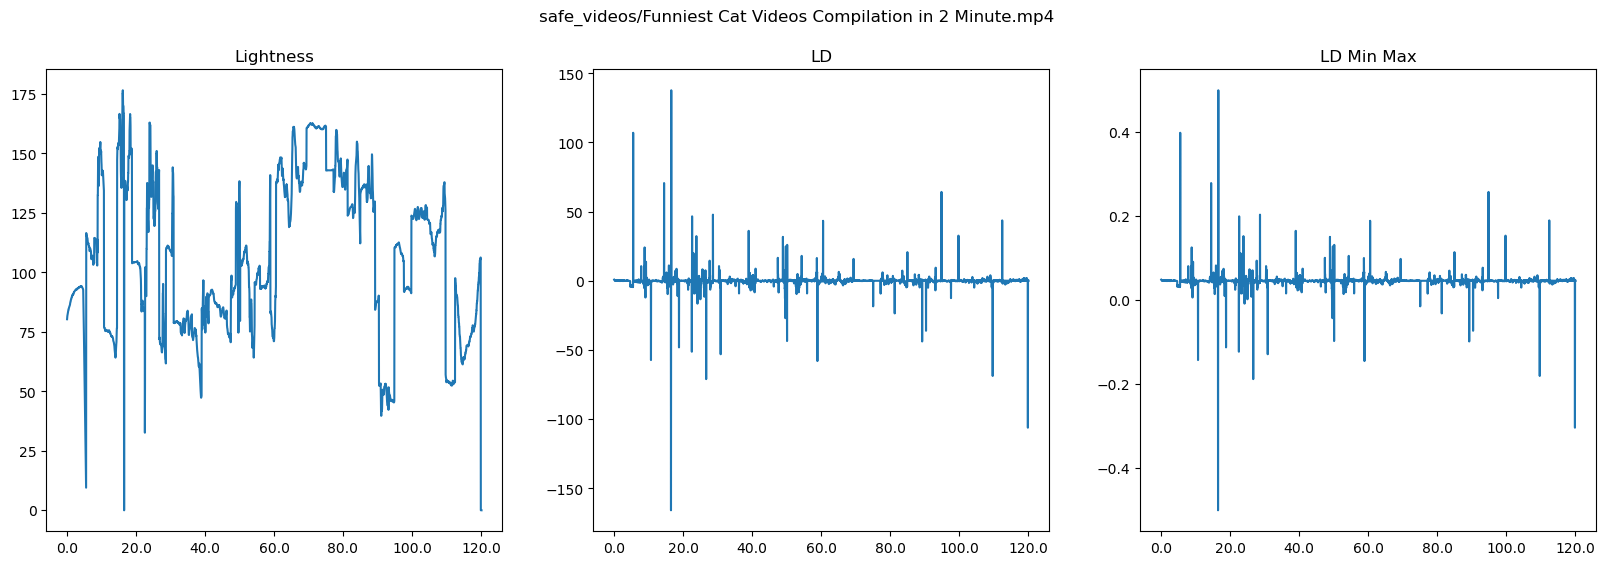

Video safe_videos/Best Short Motivational Speech Video - 24 HOURS - 1-Minute Motivation 2.mp4 FPS: 30


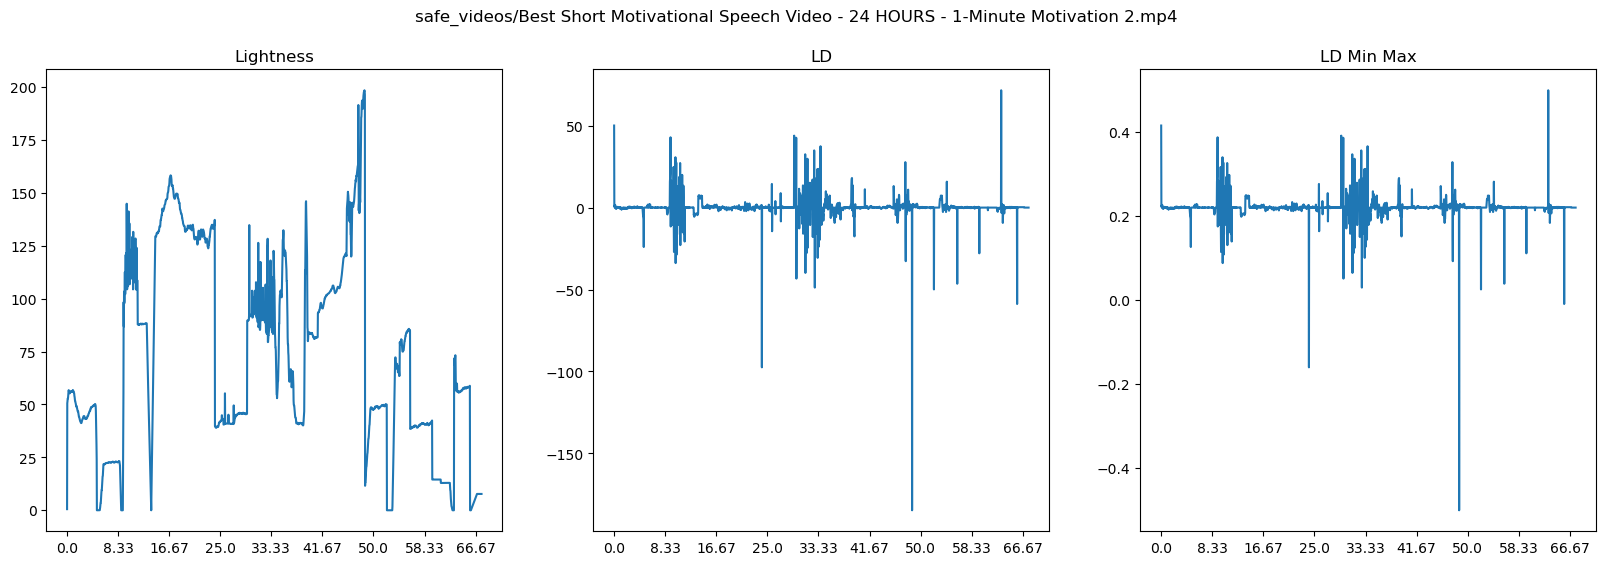

Video safe_videos/Cute Minutes - Two Minutes Funny Puppy Videos Compilation 1  FeenZoo.mp4 FPS: 24


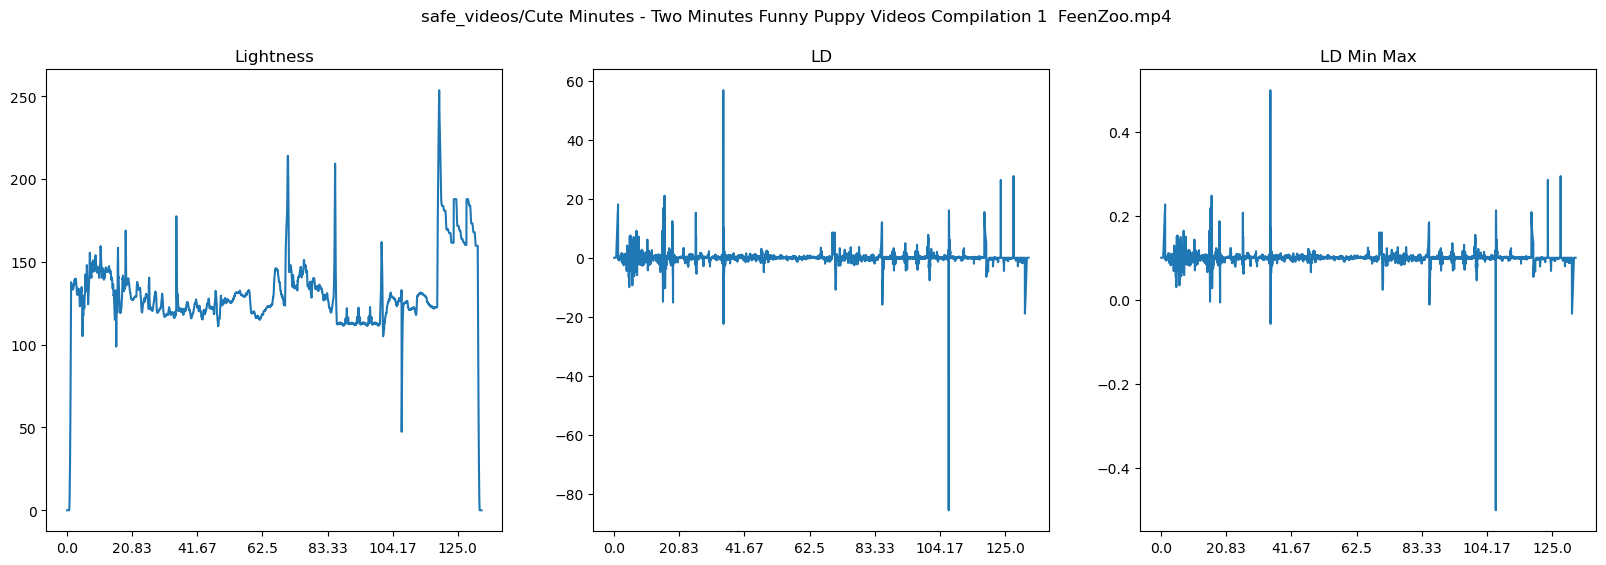

Video videos/Color Flash.mp4 FPS: 30


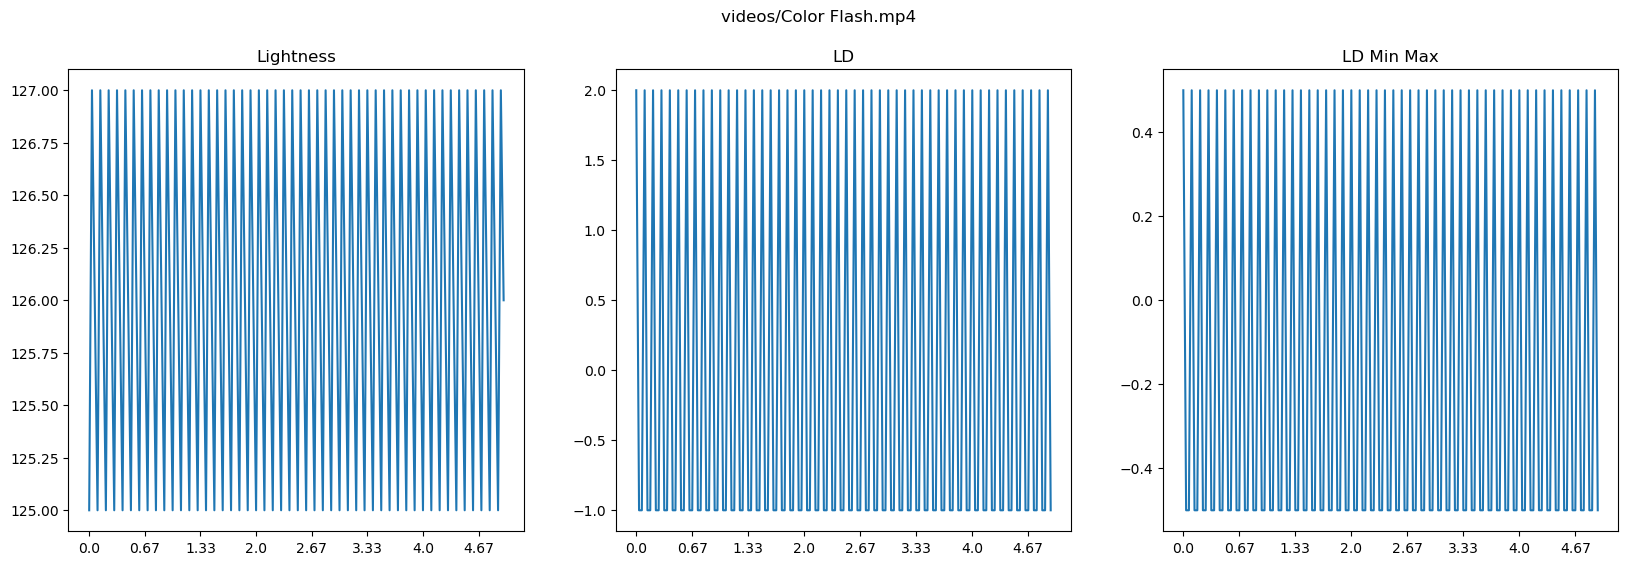

Video videos/Paparazzi flashes.mp4 FPS: 30


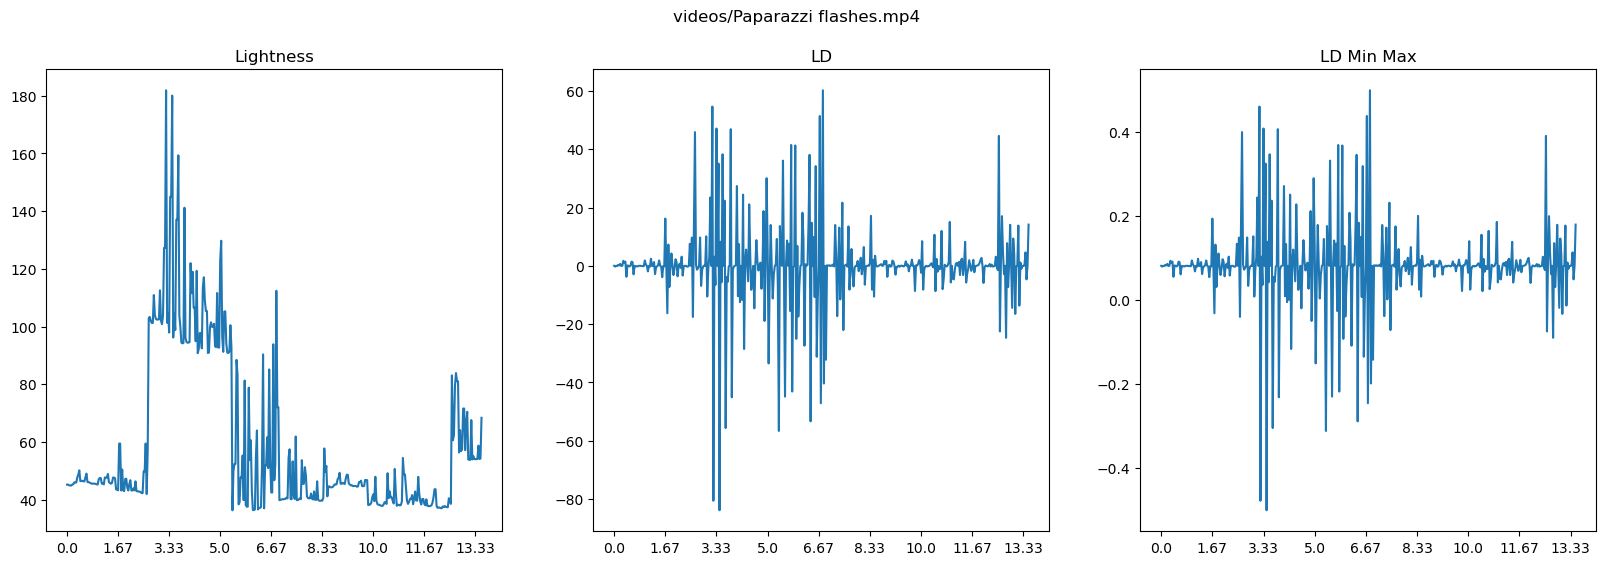

Video videos/Delete & Killshot - Disco Weapon [Epilepsy Warning].mp4 FPS: 30


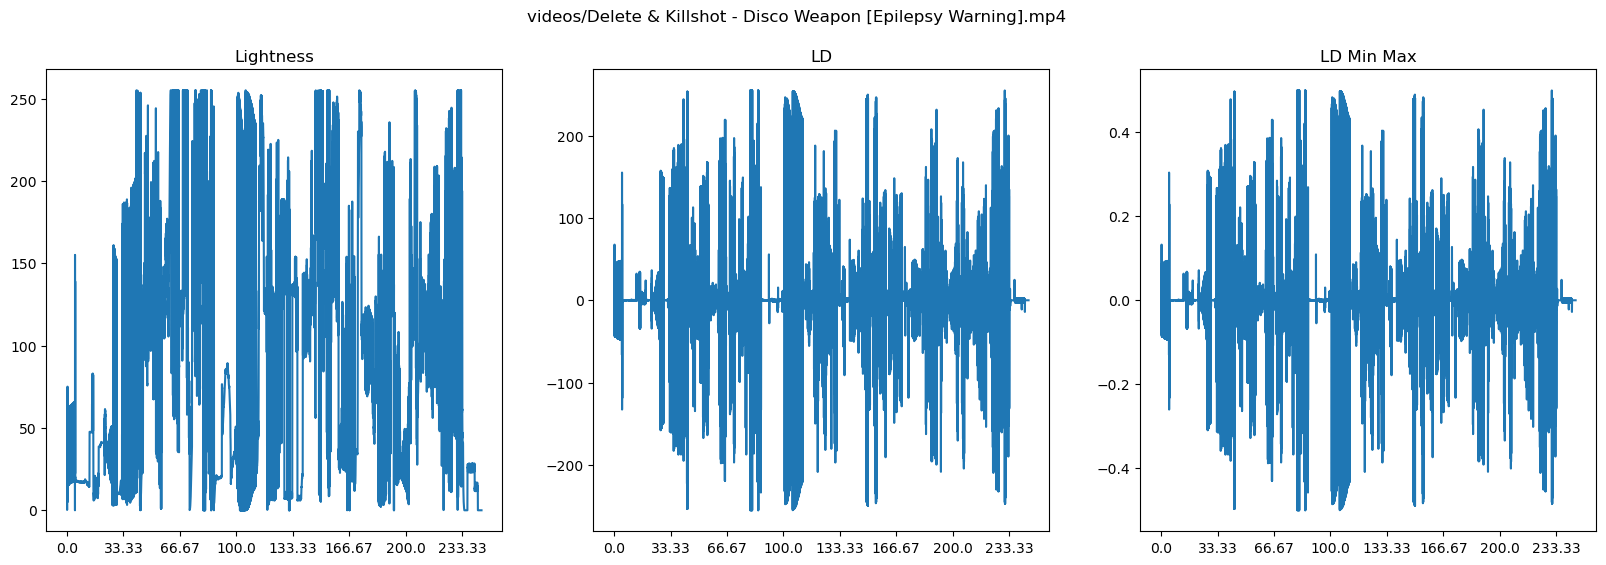

Video videos/Blue Green Flash.mp4 FPS: 30


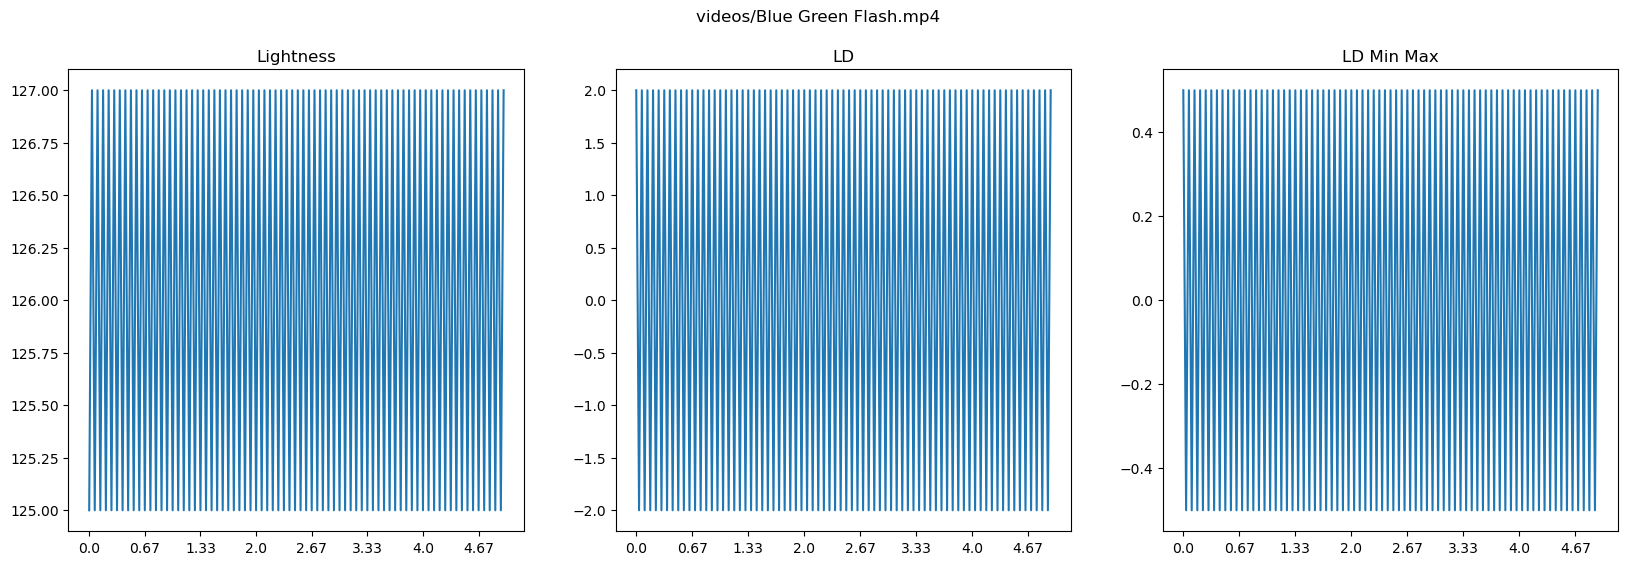

Video videos/little hens and dog.mp4 FPS: 30


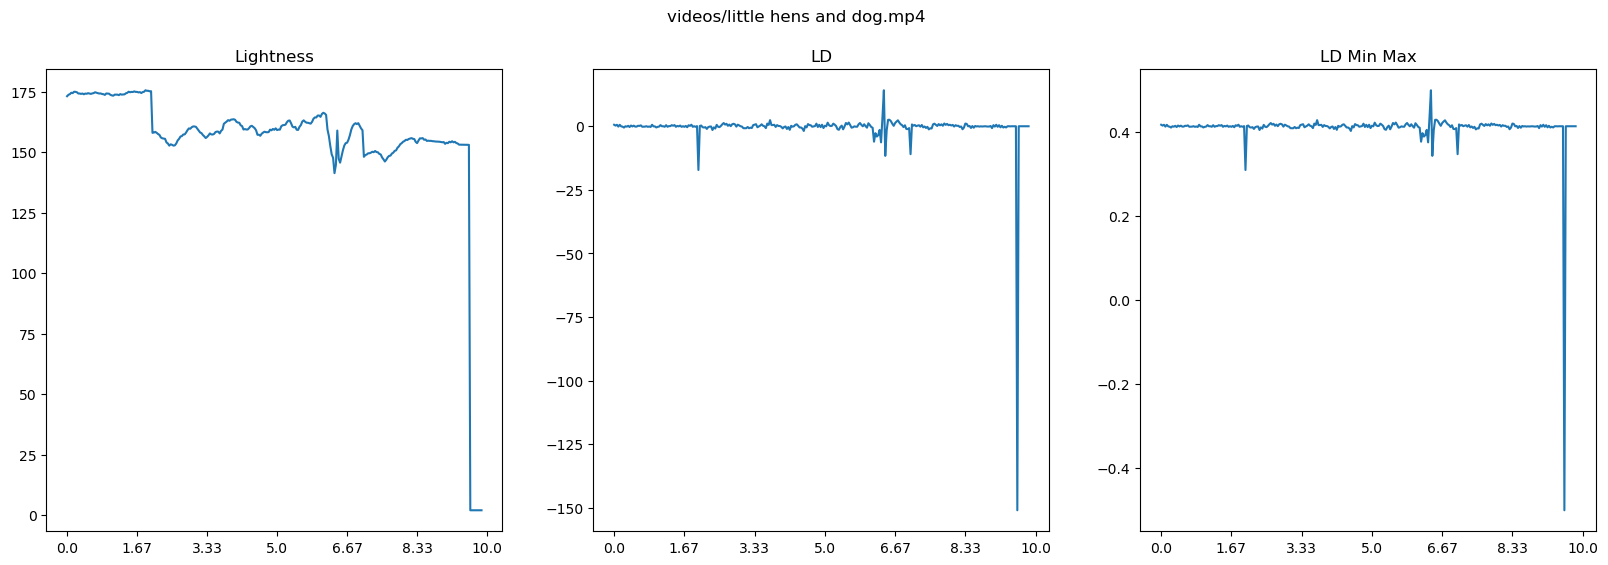

Video videos/Red Spin.mp4 FPS: 30


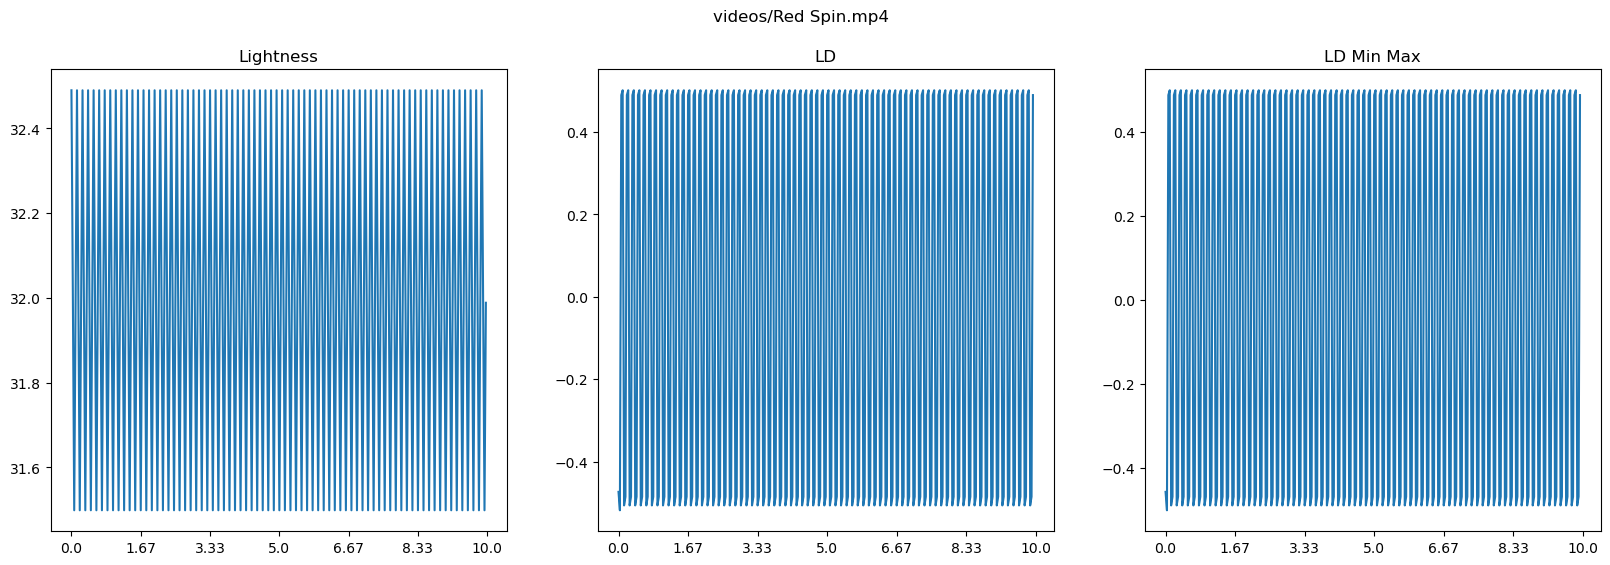

Video videos/Banned Pokemon Seizure Scene.mp4 FPS: 30


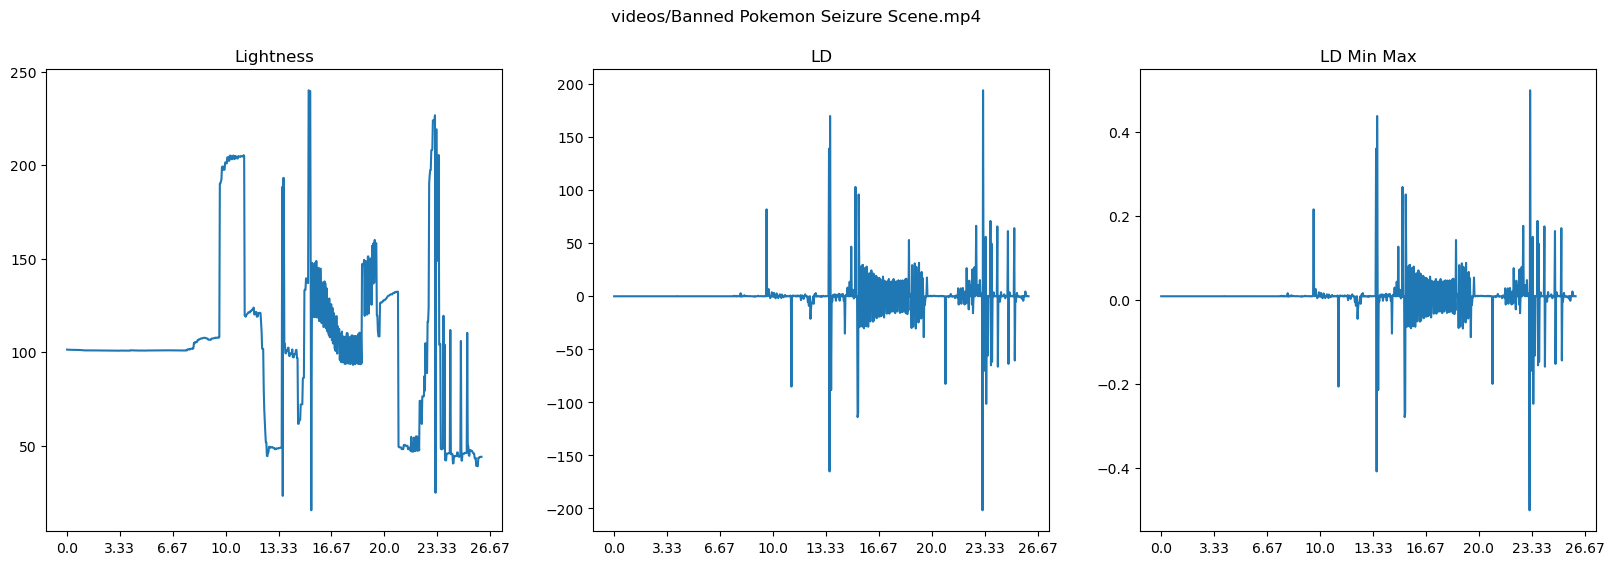

Video videos/Superman 80th Anniversary Animated Short  @dckids.mp4 FPS: 30


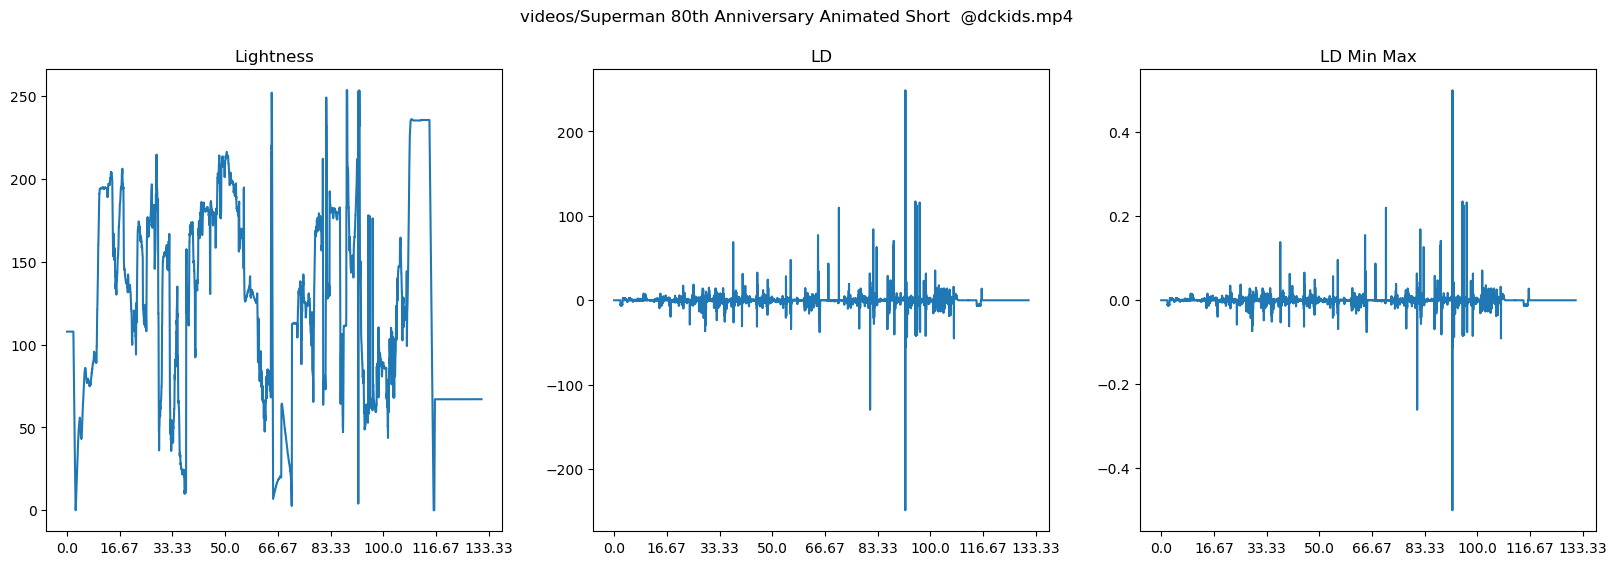

Video videos/Car flips over bridge following police pursuit.mp4 FPS: 30


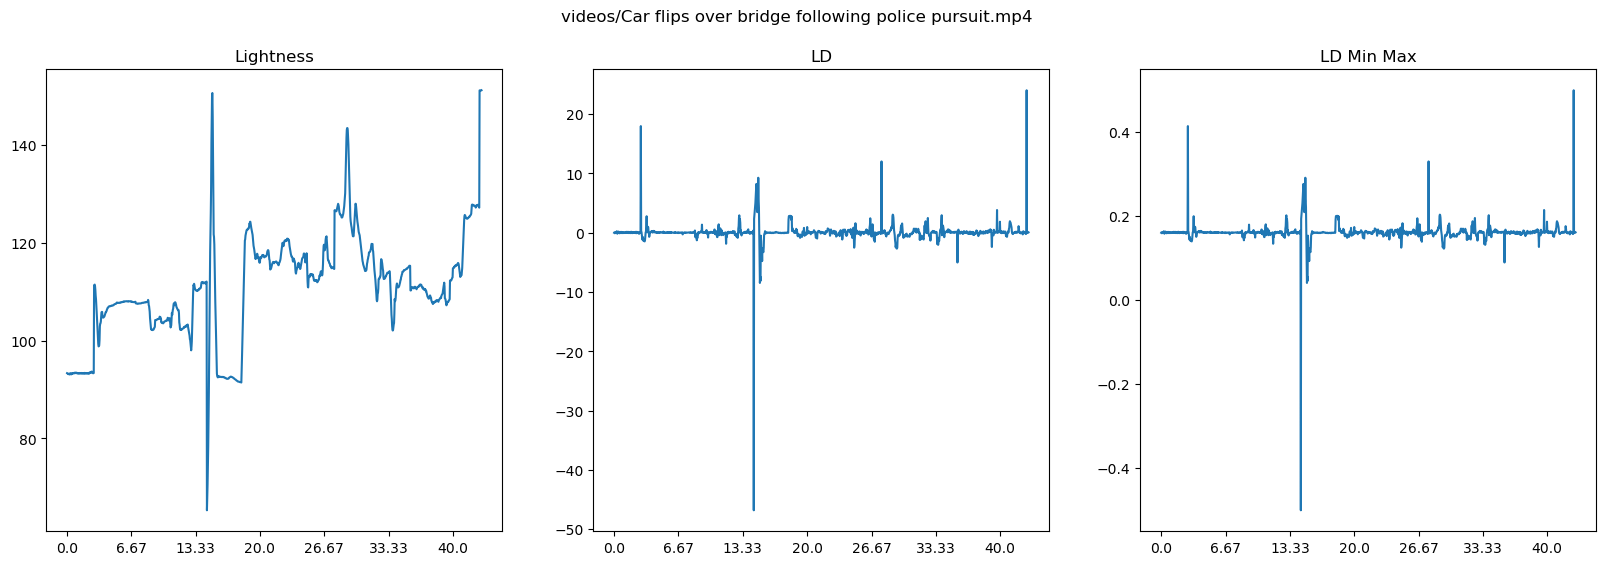

Video videos/Top 10 Dangerous Lightning Strikes Thunder recorded on Camera (HIGH VOLTAGE!!).mp4 FPS: 30


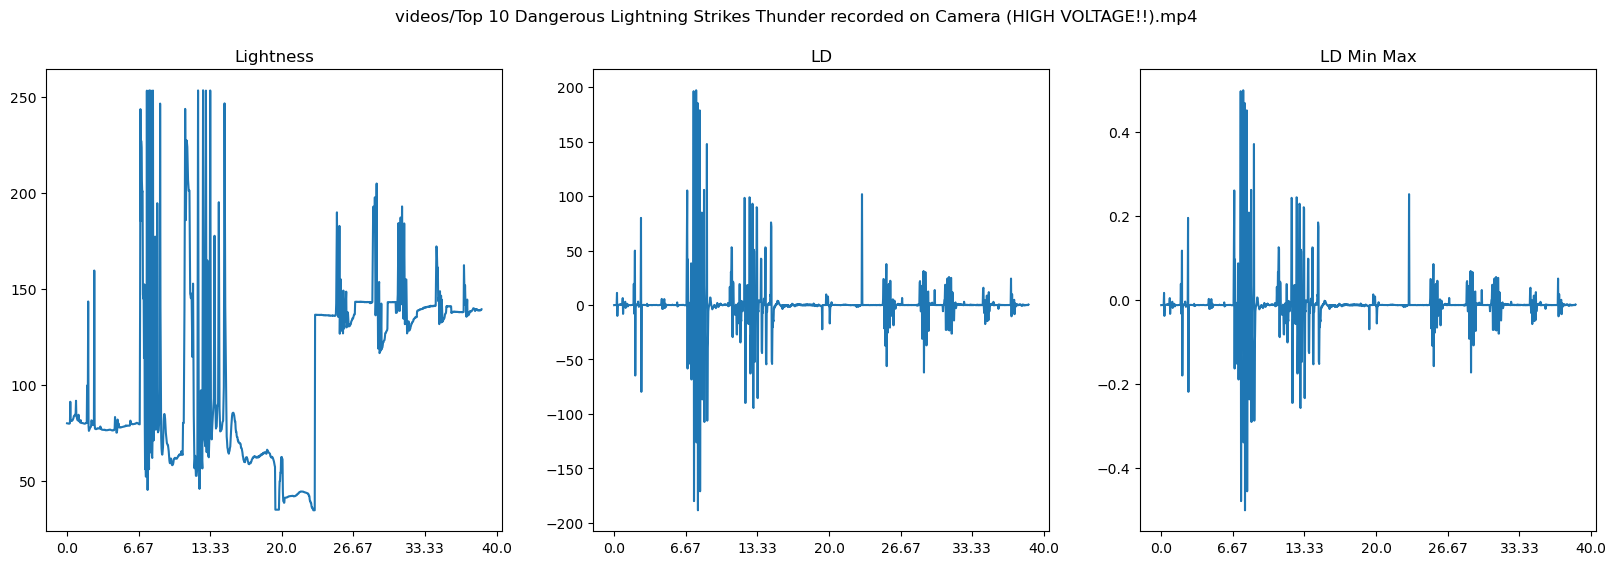

Video videos/MASSIVE gas factory explosion caught on camera!!.mp4 FPS: 30


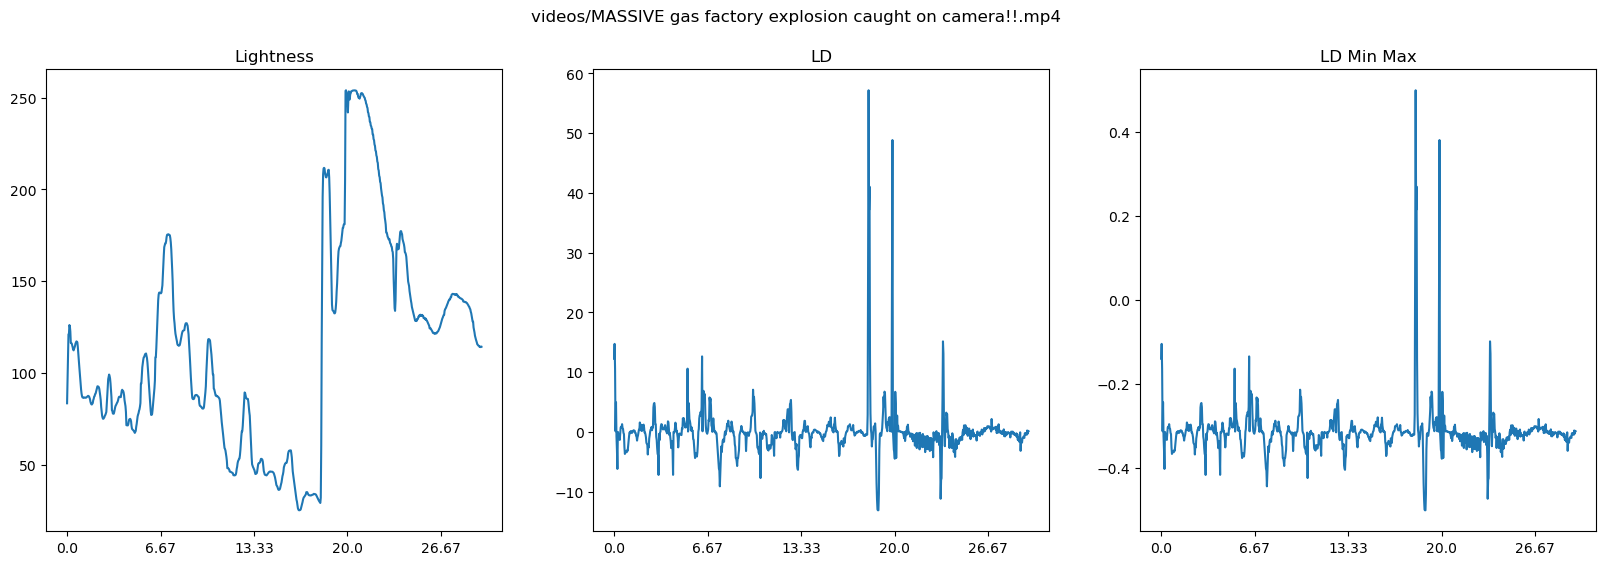

Video videos/Plant explosion caught on camera.mp4 FPS: 30


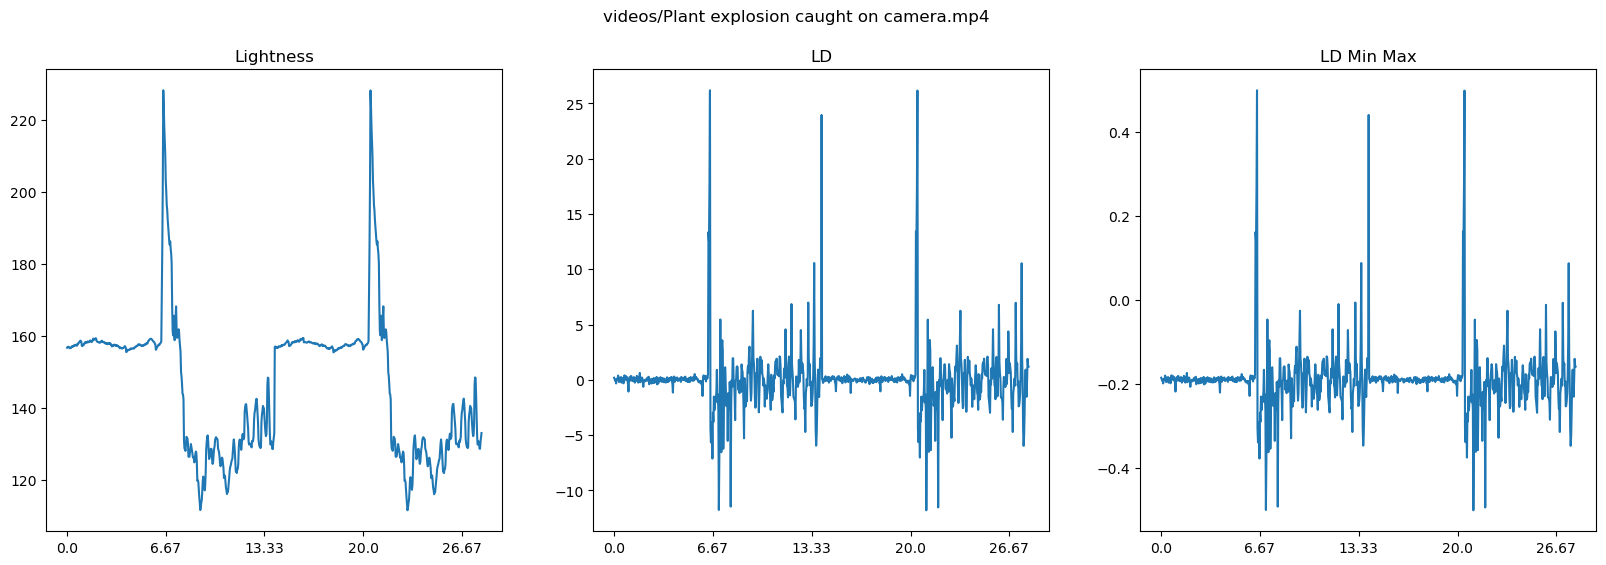

Video videos/Black White Flash.mp4 FPS: 30


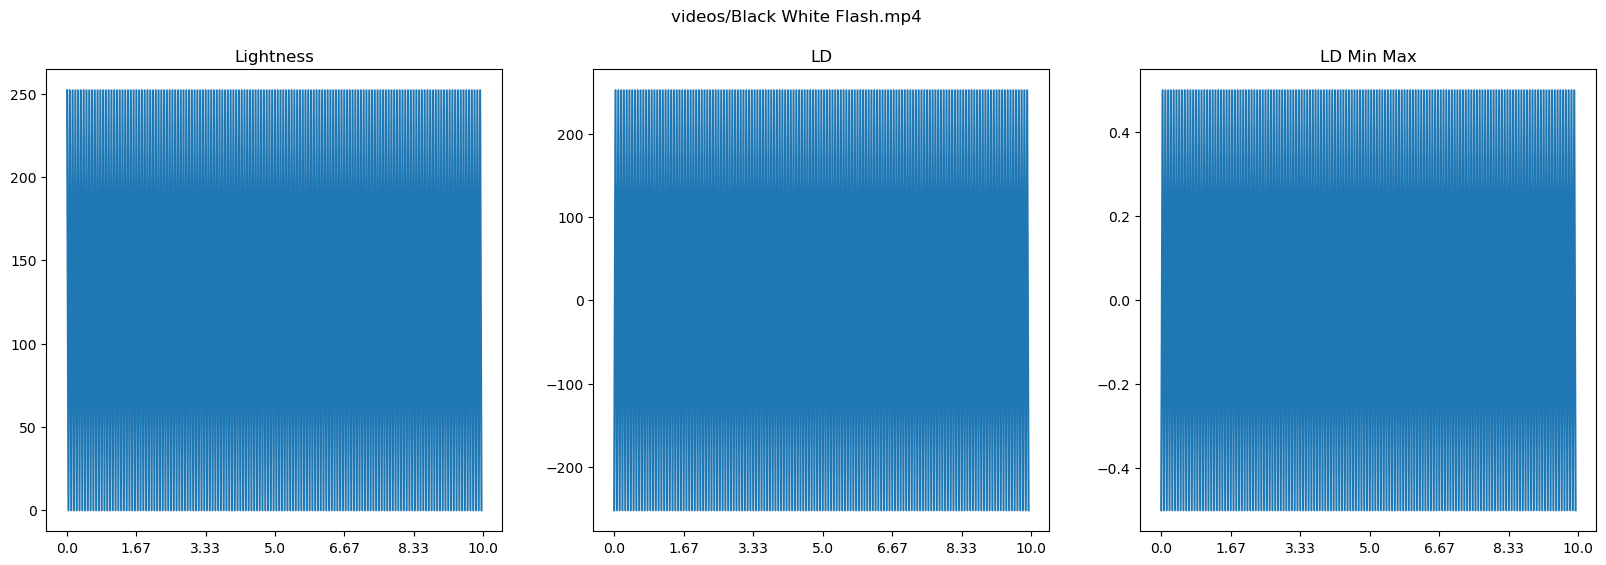

Video videos/Blue Green Fade.mp4 FPS: 30


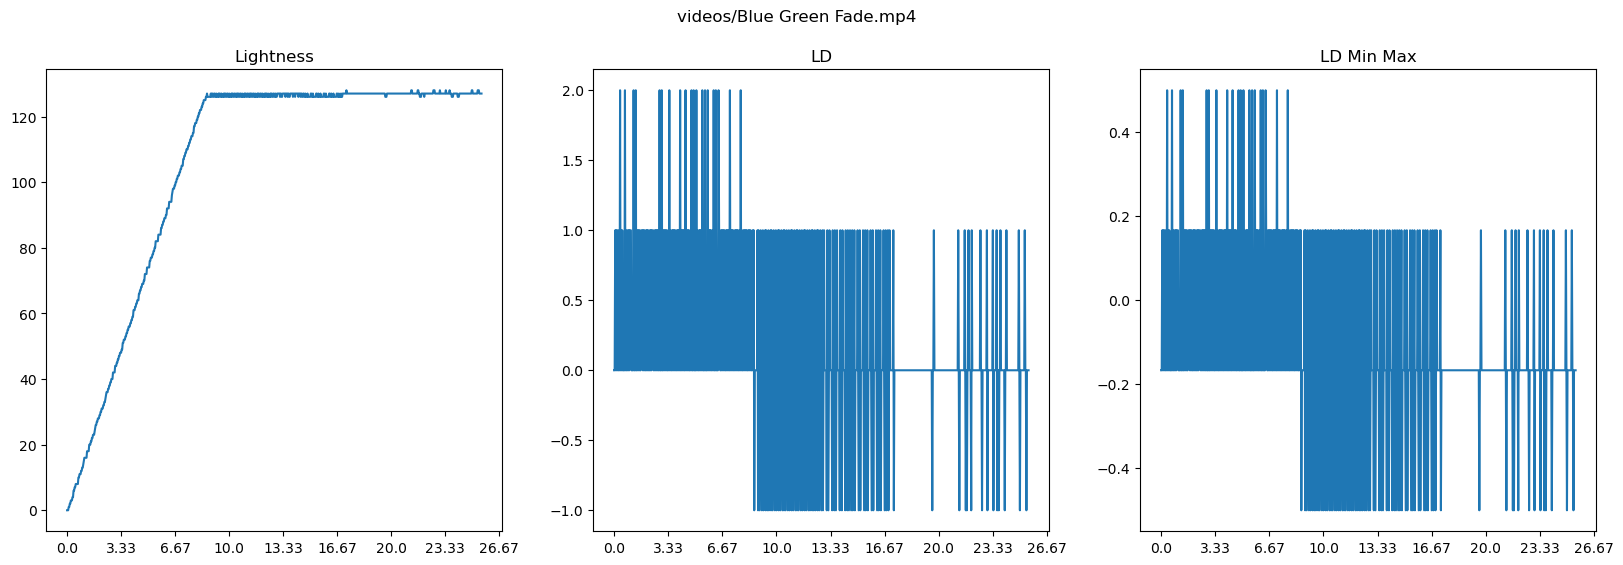

Video videos/W I L T Short Art Film by Anthony Petano  EPILEPSY WARNING.mp4 FPS: 24


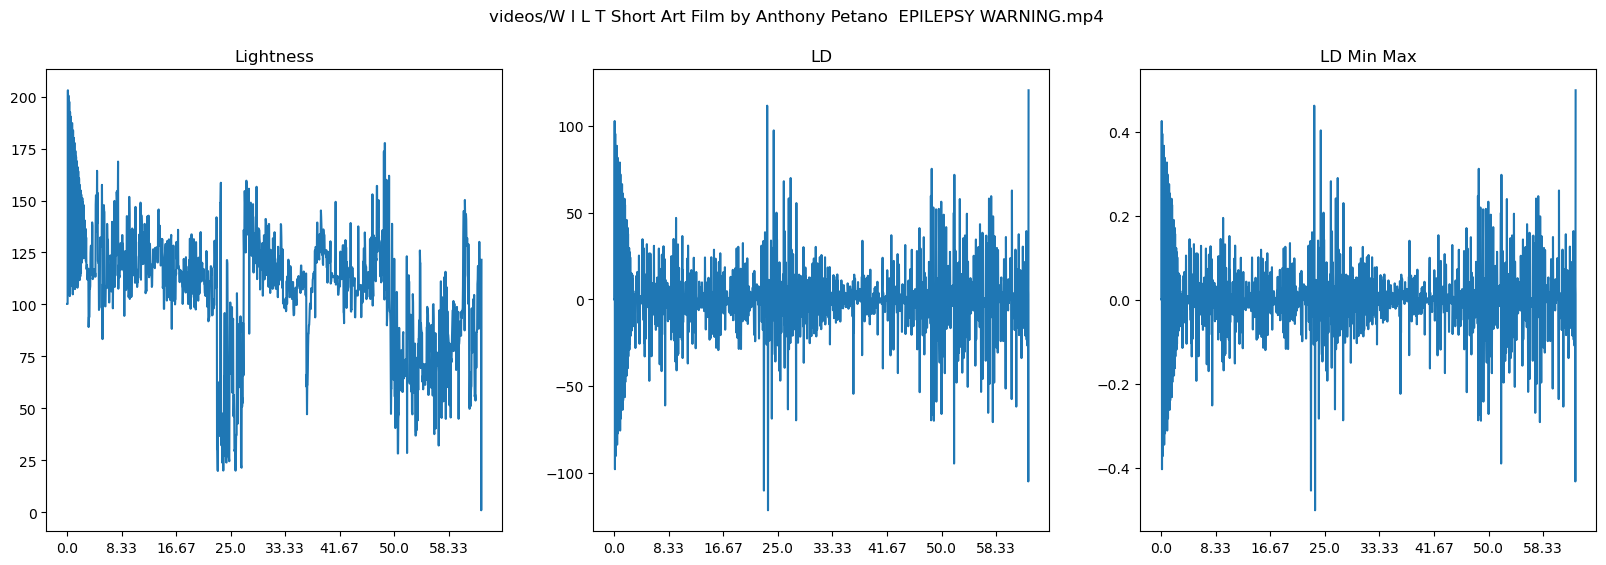

Video videos/Clutrrglych - •Ô•‘ [OFFICIAL MUSIC VIDEO] [PHOTOSENSITIVE EPILEPSY WARNING].mp4 FPS: 30


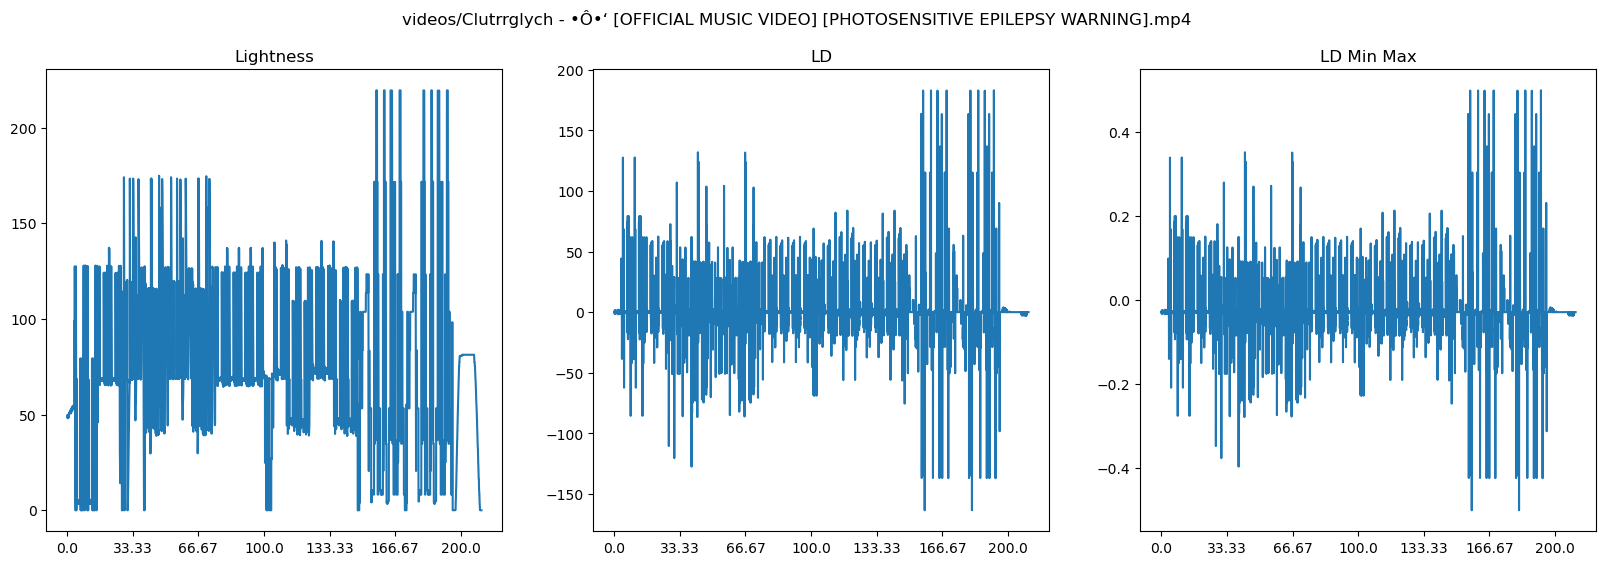

Video videos/video to induce seizures.mp4 FPS: 30


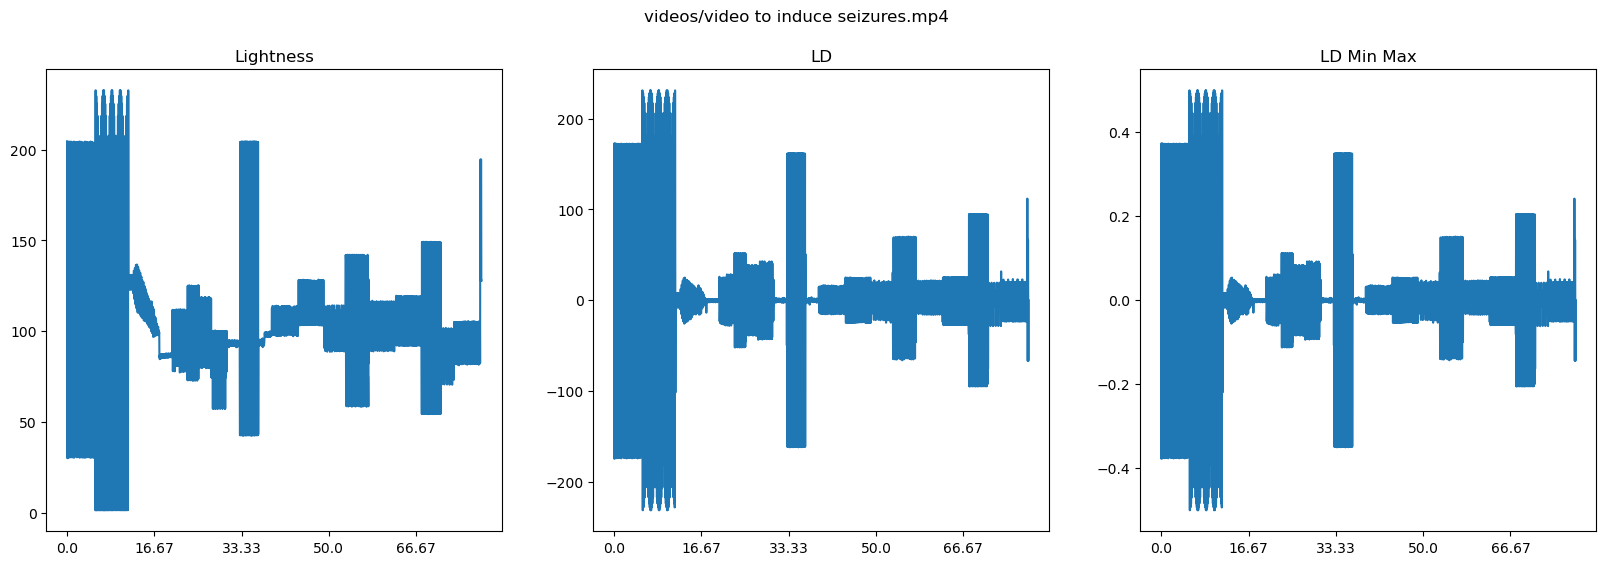

Video videos/Color Fade.mp4 FPS: 60


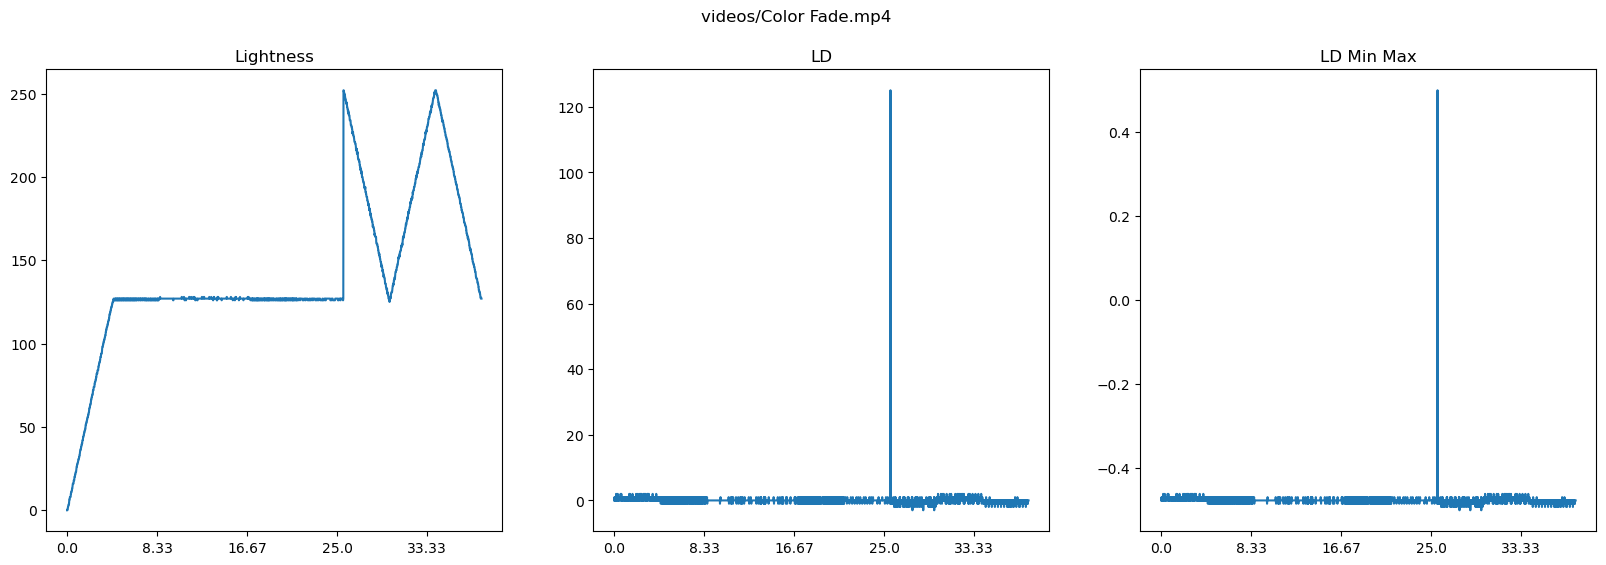

Video videos/[Epilepsy Warning]  Royal & The Serpent - Overwhelmed  Fan Music Video.mp4 FPS: 24


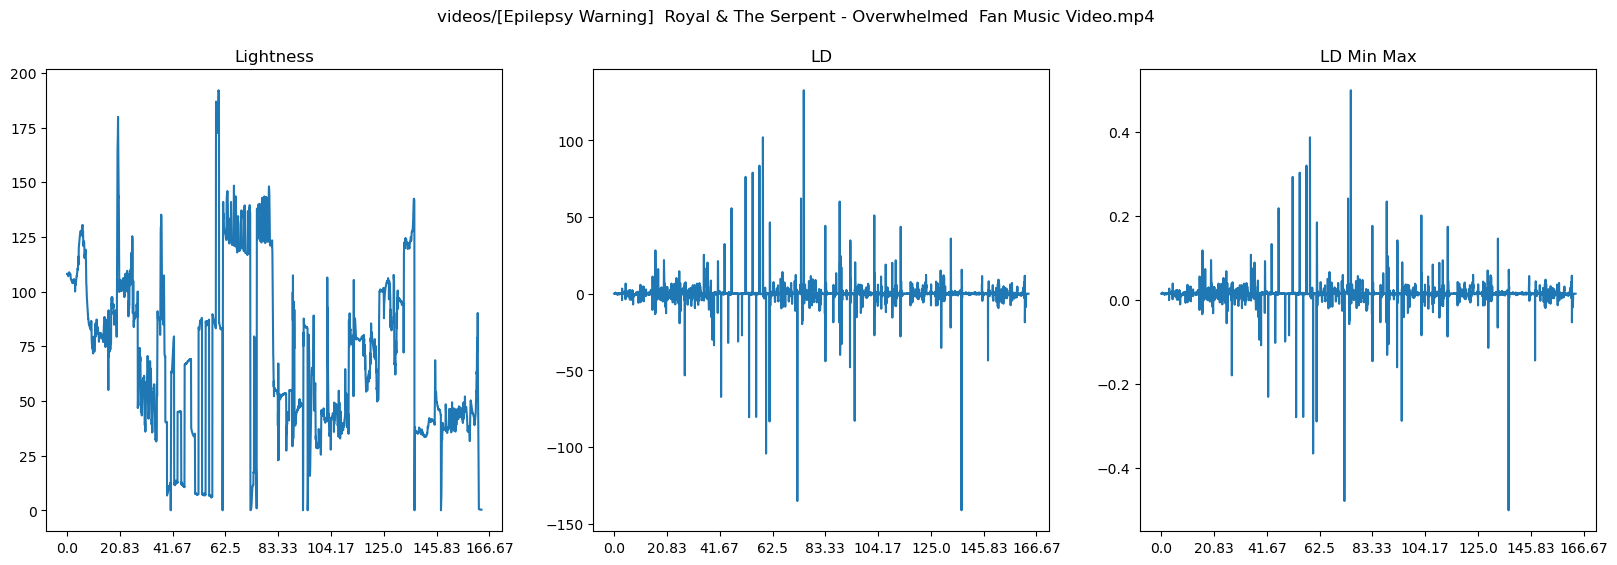

Video videos/Learn A To Z Insects For Kindergarten  A to Z  Learning Video  A To Z Reading  The Little Lumen.mp4 FPS: 25


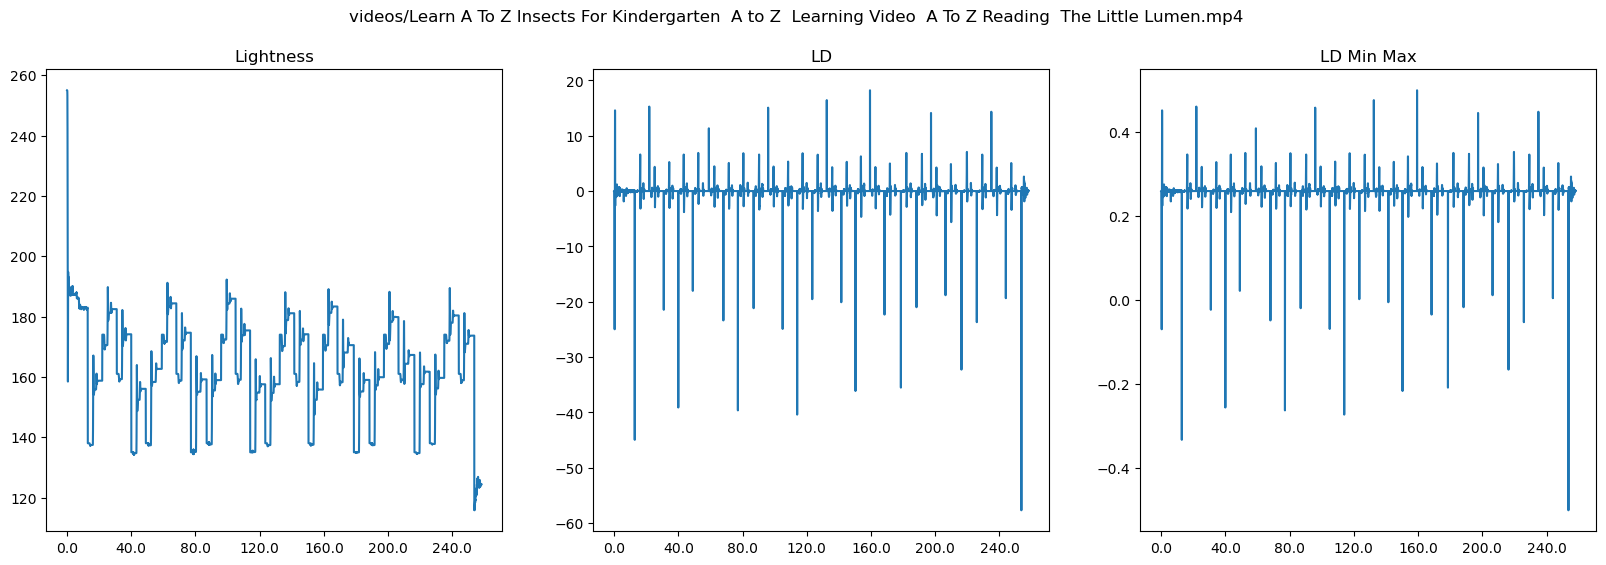

In [39]:
for f in filenames:
    
    vid, fps = VideoReader.get_vid(f, conversion=cv.COLOR_BGR2HLS)
    print(f'Video {f} FPS: {fps}')
    
    height = vid.shape[1]
    width = vid.shape[2]
    lightness_per_frame = vid.reshape(-1, 3)[:, 1].reshape((-1, height*width))
    av_lightness_per_frame = np.mean(lightness_per_frame,axis=1)
    ld = np.diff(av_lightness_per_frame, 1)
    minmax = (ld - ld.min())/(ld.max() - ld.min()) - 0.5

    plt.figure(figsize=(20, 6))
    plt.suptitle(f)

    plt.subplot(131)
    plot(av_lightness_per_frame)
    locs, labels = plt.xticks()
    plt.xticks(ticks = locs[1:-1], labels= np.around(locs[1:-1] / fps, 2))
    plt.title('Lightness') # average lightness per frame


    plt.subplot(132)
    plot(ld)
    locs, labels = plt.xticks()
    plt.xticks(ticks = locs[1:-1], labels= np.around(locs[1:-1] / fps, 2))
    plt.title('LD') # lightness differenc

    plt.subplot(133)
    plot(minmax)
    locs, labels = plt.xticks()
    plt.xticks(ticks = locs[1:-1], labels= np.around(locs[1:-1] / fps, 2))
    plt.title('LD Min Max') # lightness difference scaled

    plt.show()






Closer look on little hence and dog video

In [72]:
vid, fps = VideoReader.get_vid('videos/little hens and dog.mp4', conversion=cv.COLOR_BGR2HLS)


height = vid.shape[1]
width = vid.shape[2]
lightness_per_frame = vid.reshape(-1, 3)[:, 1].reshape((-1, height*width))
len(lightness_per_frame)


297

In [73]:
# let's cut the end of video
lightness_per_frame = lightness_per_frame[:260]

In [74]:
av_lightness_per_frame = np.mean(lightness_per_frame,axis=1)
ld = np.diff(av_lightness_per_frame, 1)
minmax = (ld - ld.min())/(ld.max() - ld.min()) - 0.5

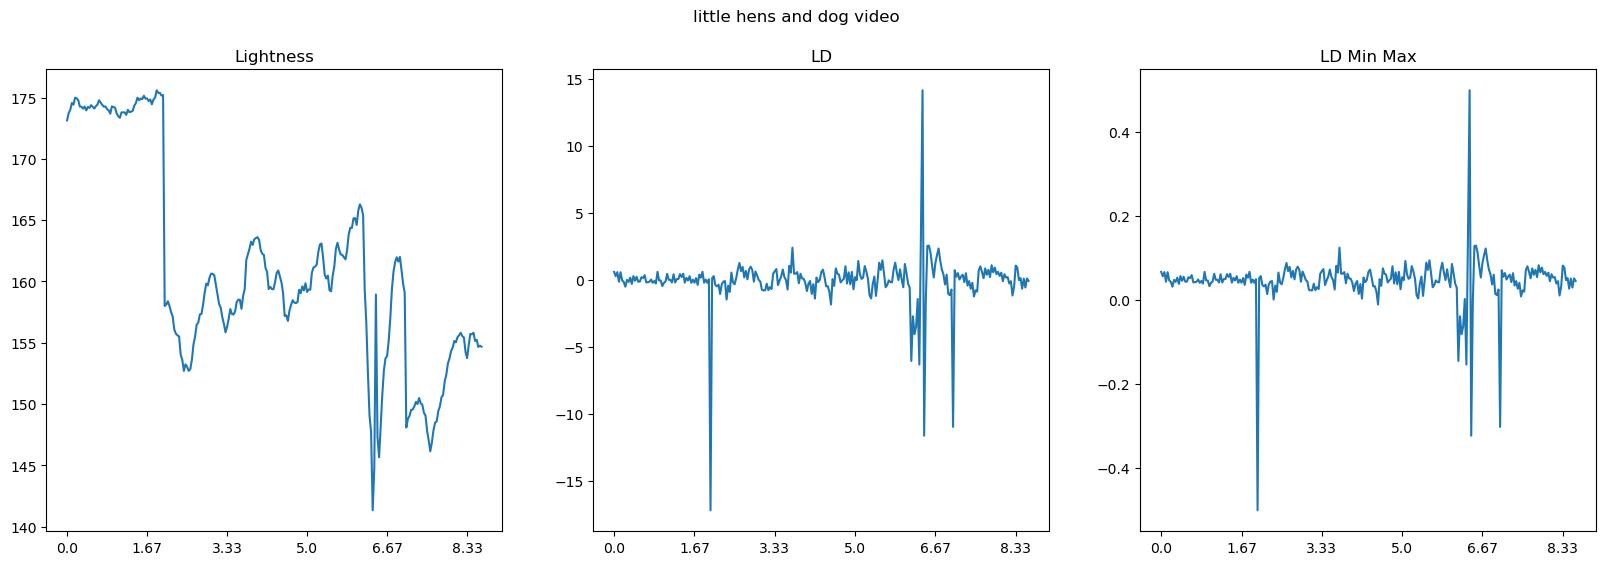

In [63]:
plt.figure(figsize=(20, 6))
plt.suptitle('little hens and dog video')

plt.subplot(131)
plot(av_lightness_per_frame)
locs, labels = plt.xticks()
plt.xticks(ticks = locs[1:-1], labels= np.around(locs[1:-1] / fps, 2))
plt.title('Lightness') # average lightness per frame


plt.subplot(132)
plot(ld)
locs, labels = plt.xticks()
plt.xticks(ticks = locs[1:-1], labels= np.around(locs[1:-1] / fps, 2))
plt.title('LD') # lightness differenc

plt.subplot(133)
plot(minmax)
locs, labels = plt.xticks()
plt.xticks(ticks = locs[1:-1], labels= np.around(locs[1:-1] / fps, 2))
plt.title('LD Min Max') # lightness difference scaled

plt.show()

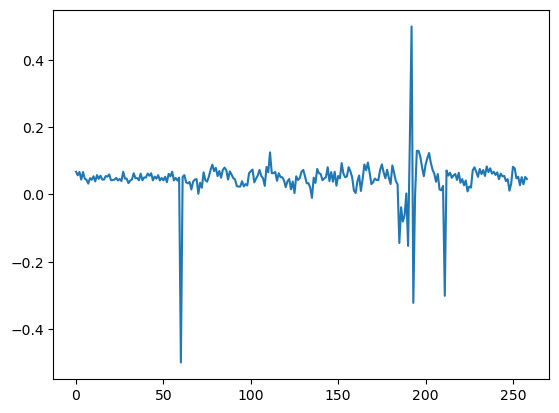

In [64]:
plot(minmax)

In [164]:
threshold = 0.02
zc = minmax.copy()
zc = np.where(np.absolute(zc) < threshold, np.nan, zc)

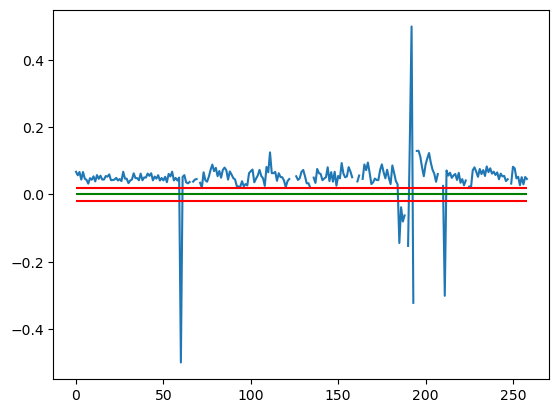

In [76]:
plot(zc)
plt.hlines(0, 0, len(zc) - 1, colors='green')
plt.hlines(threshold, 0, len(zc) -1, colors='red')
plt.hlines(0-(threshold), 0, len(zc) -1, colors='red')

In [226]:
check_zc = zc[50:70]

In [166]:
# when ld < threshold replaced by np.nan zero crossing counts indexes that are nan as well :()
np.where(np.diff(np.sign(check_zc)))[0] + 1

array([10, 11, 16, 17])

In [167]:
zc[50:70]

array([ 0.04189536,  0.05275151,  0.03655658,  0.06117428,  0.05374655,
        0.06783658,  0.04180925,  0.04920827,  0.04157325,  0.05025115,
       -0.5       ,  0.05254102,  0.05754493,  0.03628869,  0.03299421,
        0.03715935,         nan,  0.03820861,  0.0443415 ,  0.04582769])

In [168]:
#  replace with 0 and check again
check_zc = zc[50:70]
check_zc

array([ 0.04189536,  0.05275151,  0.03655658,  0.06117428,  0.05374655,
        0.06783658,  0.04180925,  0.04920827,  0.04157325,  0.05025115,
       -0.5       ,  0.05254102,  0.05754493,  0.03628869,  0.03299421,
        0.03715935,         nan,  0.03820861,  0.0443415 ,  0.04582769])

In [169]:
np.where(np.diff(np.sign(check_zc)))[0] + 1

array([10, 11, 16, 17])

In [172]:
# make forward fill
for i in range(1, check_zc.shape[0]):
    if np.isnan(check_zc[i]):
        check_zc[i] = check_zc[i-1]

In [173]:
check_zc

array([ 0.04189536,  0.05275151,  0.03655658,  0.06117428,  0.05374655,
        0.06783658,  0.04180925,  0.04920827,  0.04157325,  0.05025115,
       -0.5       ,  0.05254102,  0.05754493,  0.03628869,  0.03299421,
        0.03715935,  0.03715935,  0.03820861,  0.0443415 ,  0.04582769])

In [174]:
np.where(np.diff(np.sign(check_zc)))[0] + 1

array([10, 11])

Forward fill(propagedes the last valued observation forward) fixed the problem

In [224]:
def ffill(arr: np.array):
    '''forward fill the values in 1D numpy array'''
    # create a mask for null values
    mask = np.isnan(arr)
    # create an array to hold indexes
    idx = np.where(~mask, np.arange(mask.size), 0)
    # forward fill indexes (accumulate will retrun the max # of every element in array)
    np.maximum.accumulate(idx, out=idx)
    # forward fill the original array
    return arr[idx]

In [225]:
def bfill(arr: np.array):
    '''backward fill array'''
    # create a reverse mask for null values
    mask = np.isnan(arr[::-1])
    # create an array to hold indexes for reversed array
    idx = np.where(~mask, np.arange(mask.size), 0)
    # backill indexes (forward fill the reversed array of indexes)
    np.maximum.accumulate(idx, out=idx)
    # apply reversed indexes to revered array and reverse it back to get an original array :)
    return arr[::-1][idx][::-1]



In [227]:
# check functions
check_zc = ffill(check_zc)

In [228]:
check_zc = bfill(check_zc)

In [230]:
np.where(np.diff(np.sign(check_zc)))[0] + 1

array([10, 11])

purrrrrfect :)

Video safe_videos/LION MENTALITY - Motivational Video.mp4 FPS: 25


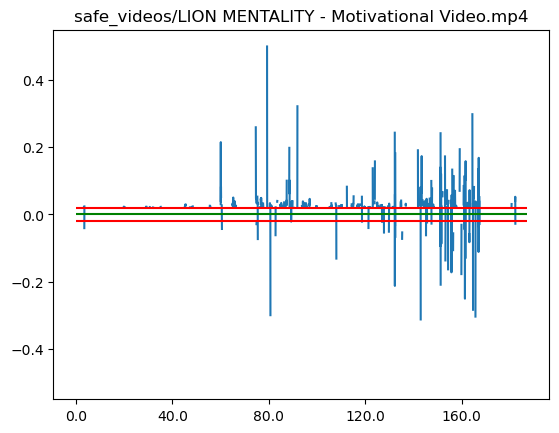

Video safe_videos/Motivational short video - How to succeed - cartoon.mp4 FPS: 30


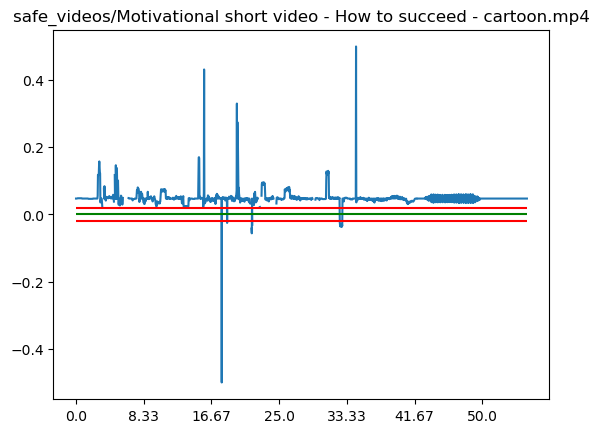

Video safe_videos/I Will Guess Your Name In One Minute!.mp4 FPS: 30


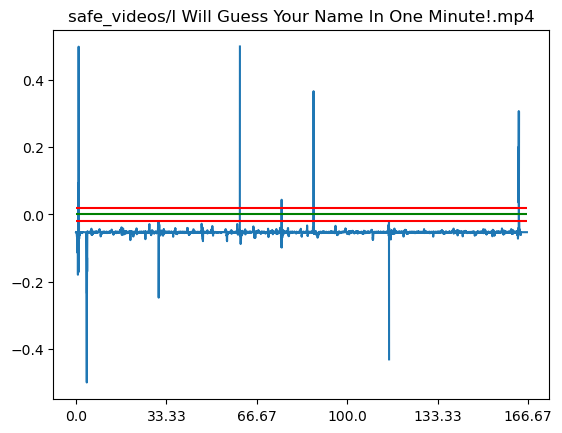

Video safe_videos/hitched - 2 Minute Short Film.mp4 FPS: 24


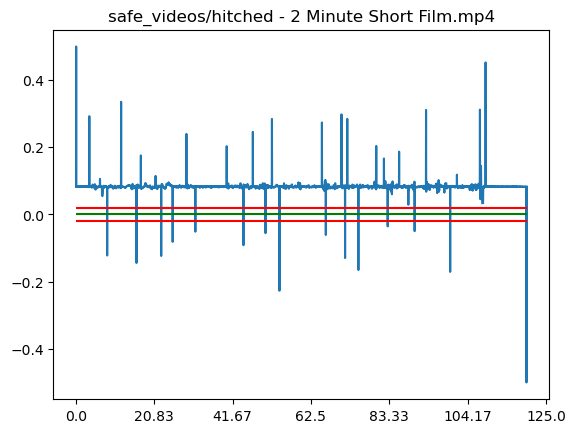

Video safe_videos/THE SEED  Inspirational Short Film.mp4 FPS: 24


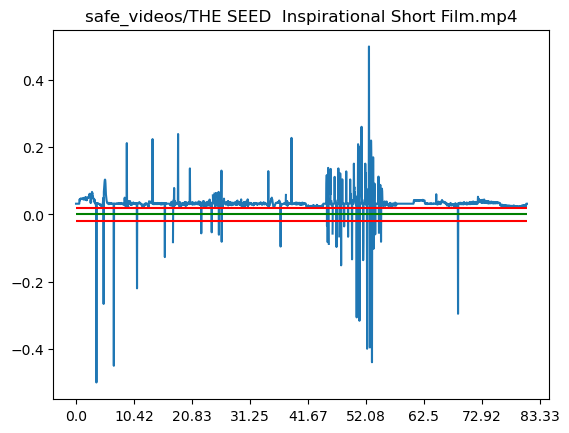

Video safe_videos/Disney Pixar Piper - Music by lewisjackmusic.mp4 FPS: 24


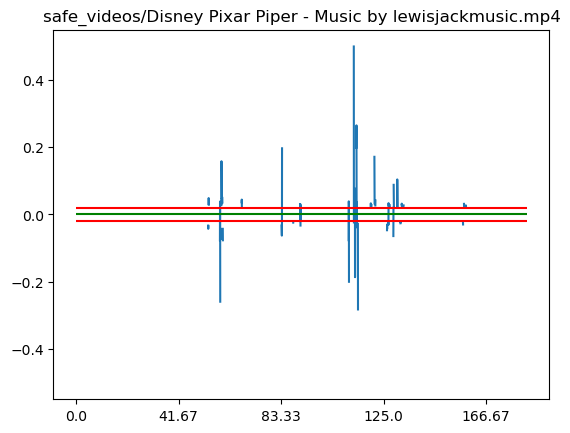

Video safe_videos/10 DAKİKADA BAZLAMA🔊İSTER KAHVALTIDA🔝İSTER ÇAY SAATİNDE🔝İSTER YEMEK YANINDA YE✌️YOK BÖYLE YUMUŞAKLIK.mp4 FPS: 30


/usr/local/Caskroom/mambaforge/base/envs/epilator/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/Caskroom/mambaforge/base/envs/epilator/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


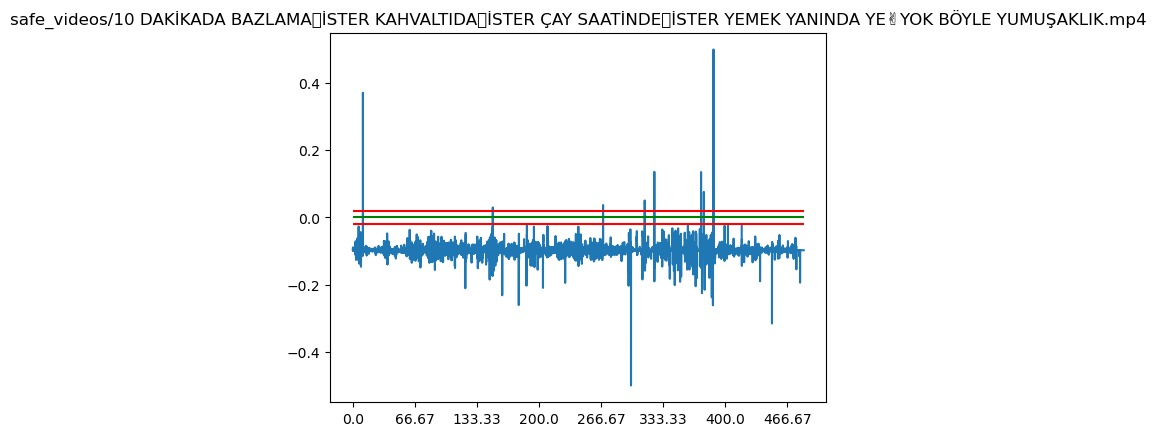

Video safe_videos/Funniest Cat Videos Compilation in 2 Minute.mp4 FPS: 25


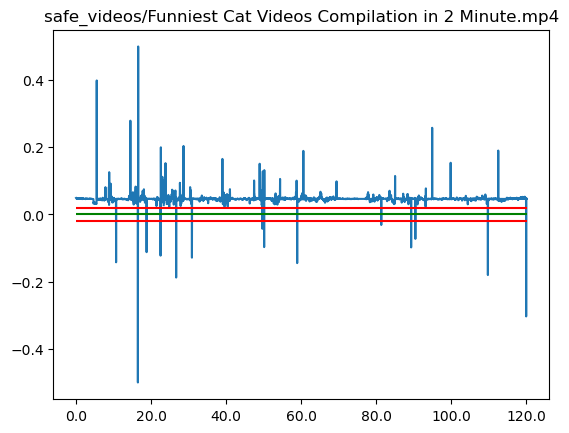

Video safe_videos/Best Short Motivational Speech Video - 24 HOURS - 1-Minute Motivation 2.mp4 FPS: 30


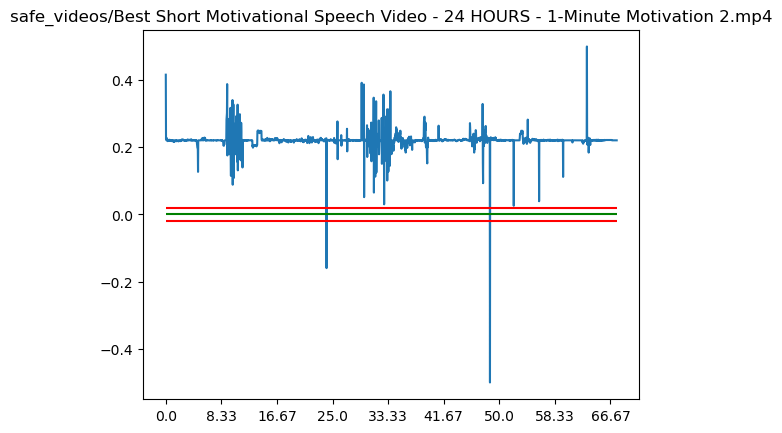

Video safe_videos/Cute Minutes - Two Minutes Funny Puppy Videos Compilation 1  FeenZoo.mp4 FPS: 24


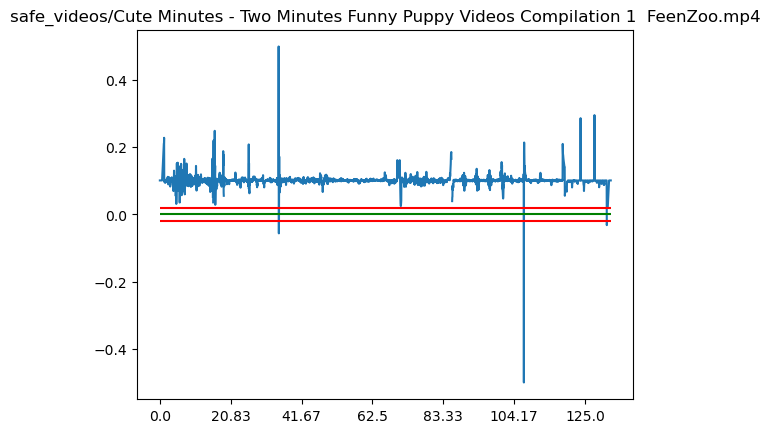

Video videos/Color Flash.mp4 FPS: 30


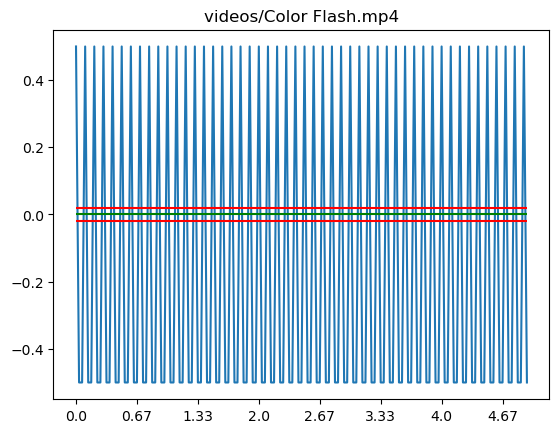

Video videos/Paparazzi flashes.mp4 FPS: 30


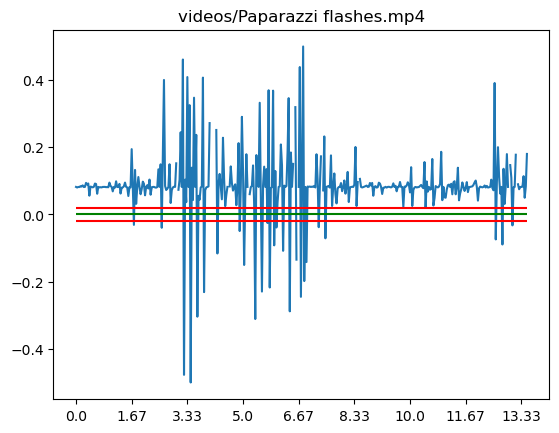

Video videos/Delete & Killshot - Disco Weapon [Epilepsy Warning].mp4 FPS: 30


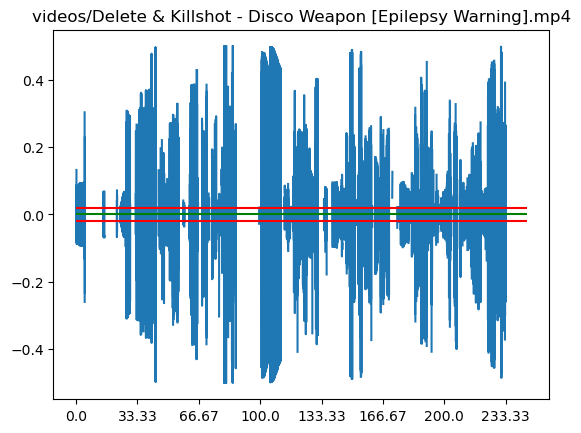

Video videos/Blue Green Flash.mp4 FPS: 30


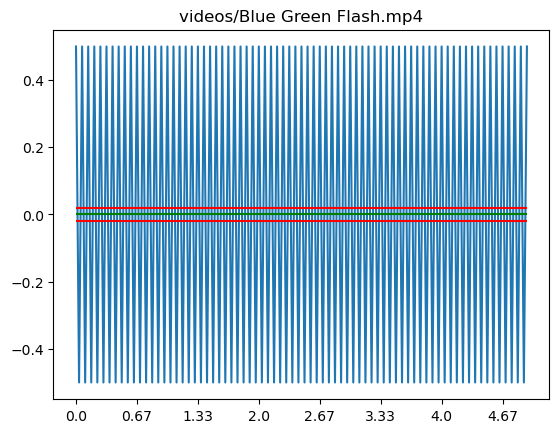

Video videos/little hens and dog.mp4 FPS: 30


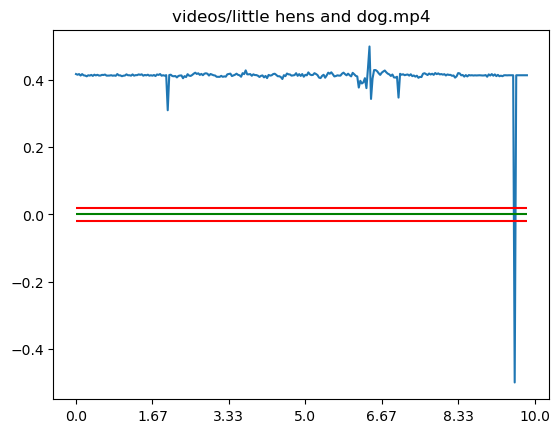

Video videos/Red Spin.mp4 FPS: 30


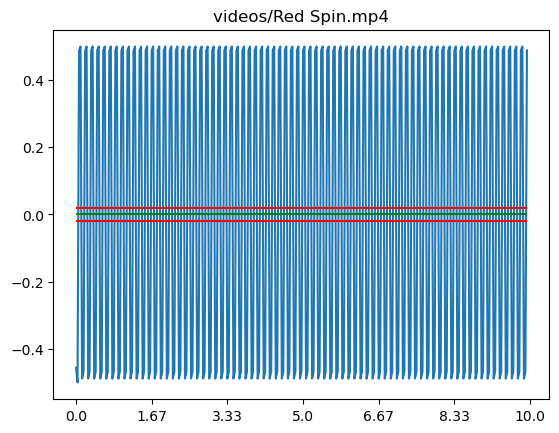

Video videos/Banned Pokemon Seizure Scene.mp4 FPS: 30


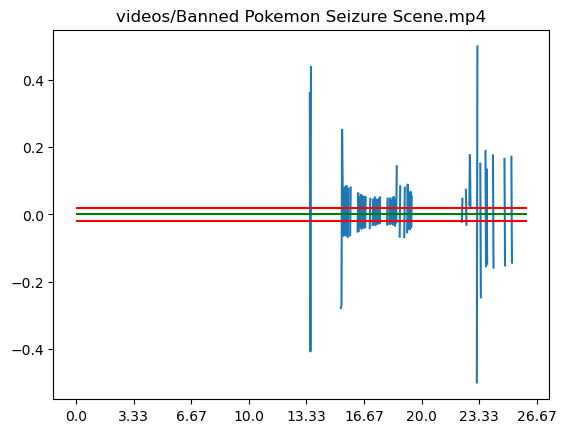

Video videos/Superman 80th Anniversary Animated Short  @dckids.mp4 FPS: 30


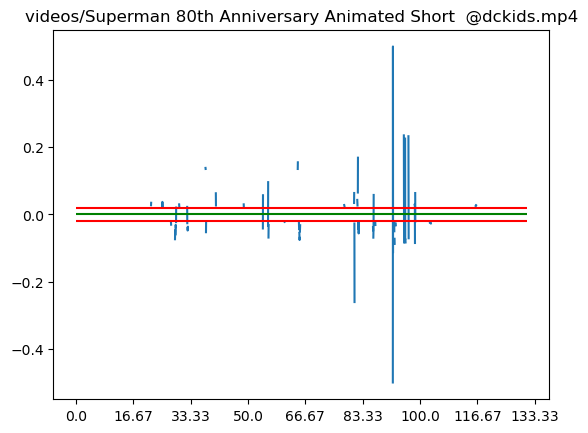

Video videos/Car flips over bridge following police pursuit.mp4 FPS: 30


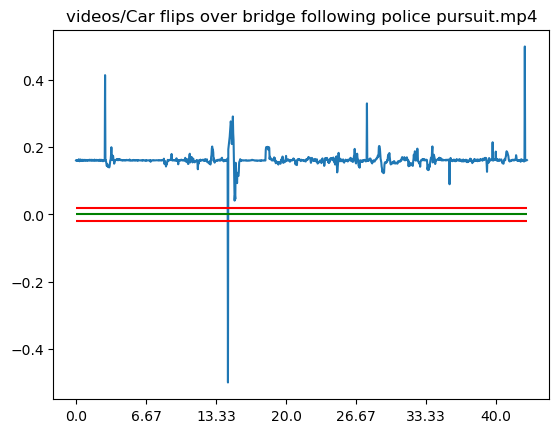

Video videos/Top 10 Dangerous Lightning Strikes Thunder recorded on Camera (HIGH VOLTAGE!!).mp4 FPS: 30


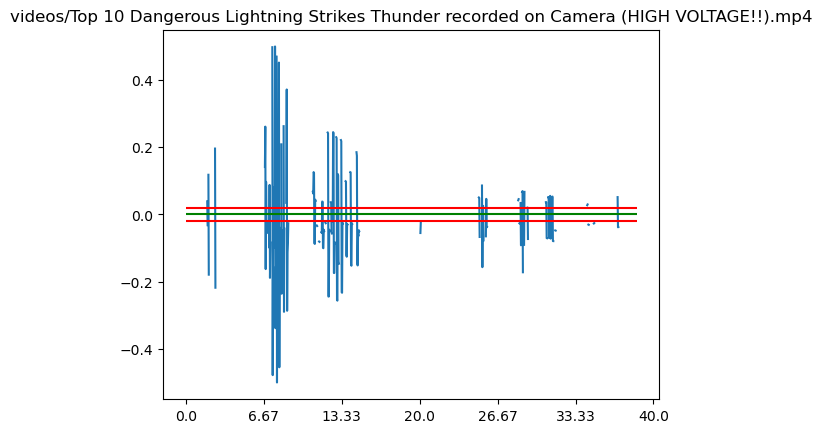

Video videos/MASSIVE gas factory explosion caught on camera!!.mp4 FPS: 30


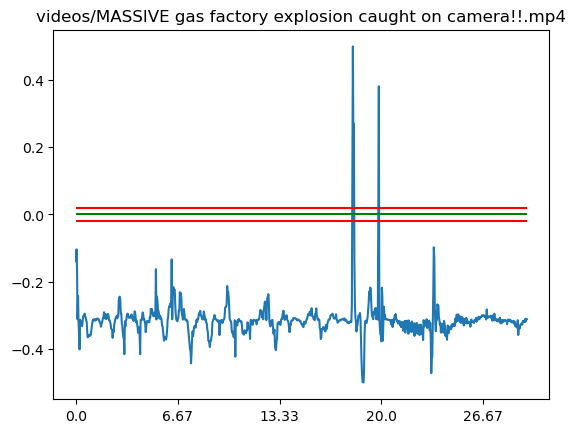

Video videos/Plant explosion caught on camera.mp4 FPS: 30


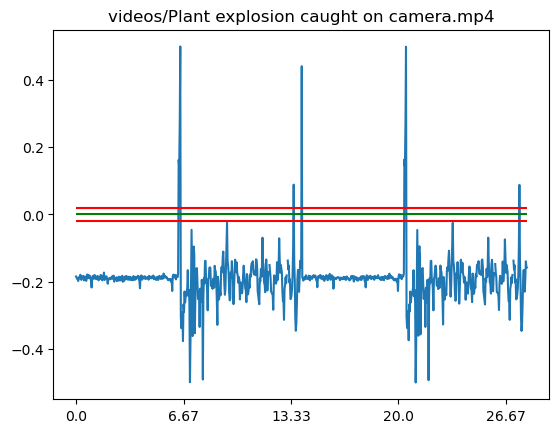

Video videos/Black White Flash.mp4 FPS: 30


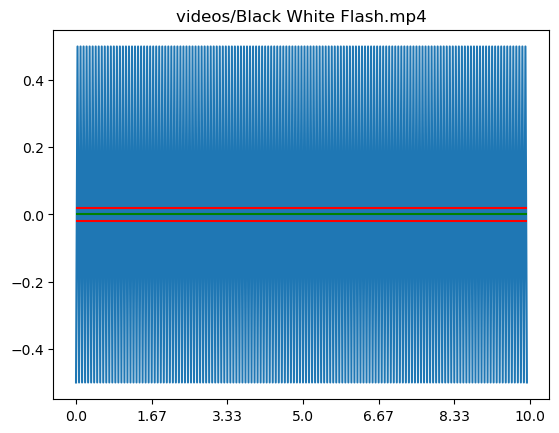

Video videos/Blue Green Fade.mp4 FPS: 30


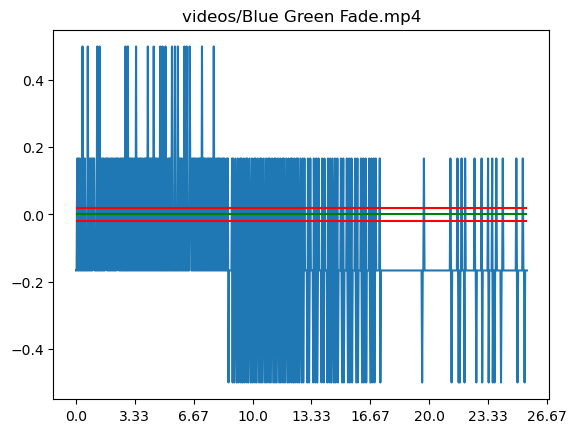

Video videos/W I L T Short Art Film by Anthony Petano  EPILEPSY WARNING.mp4 FPS: 24


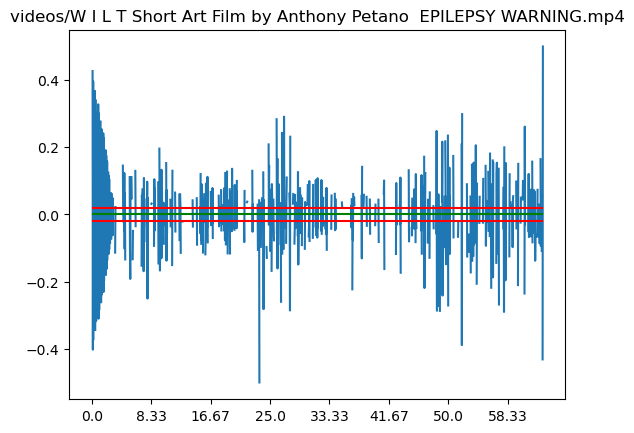

Video videos/Clutrrglych - •Ô•‘ [OFFICIAL MUSIC VIDEO] [PHOTOSENSITIVE EPILEPSY WARNING].mp4 FPS: 30


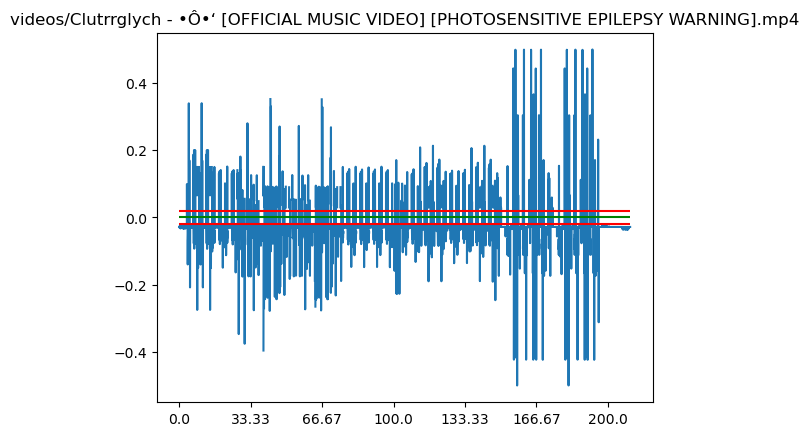

Video videos/video to induce seizures.mp4 FPS: 30


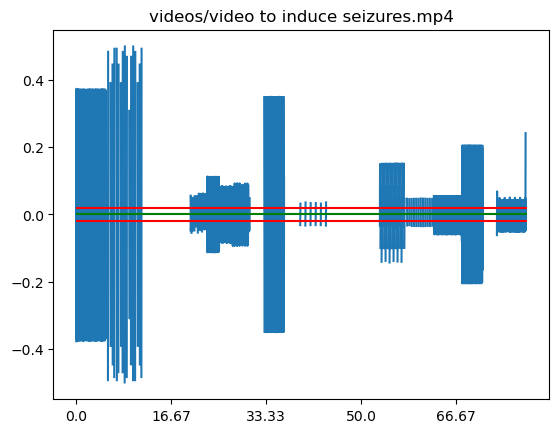

Video videos/Color Fade.mp4 FPS: 60


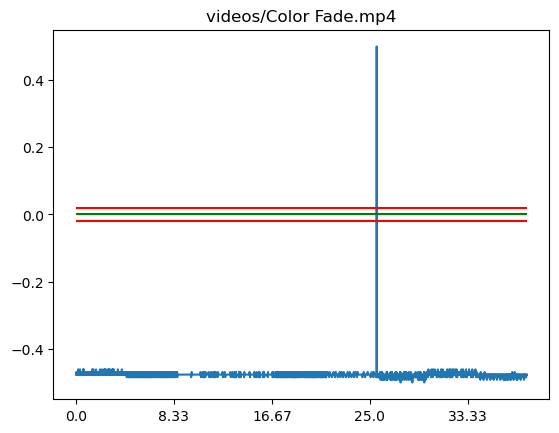

Video videos/[Epilepsy Warning]  Royal & The Serpent - Overwhelmed  Fan Music Video.mp4 FPS: 24


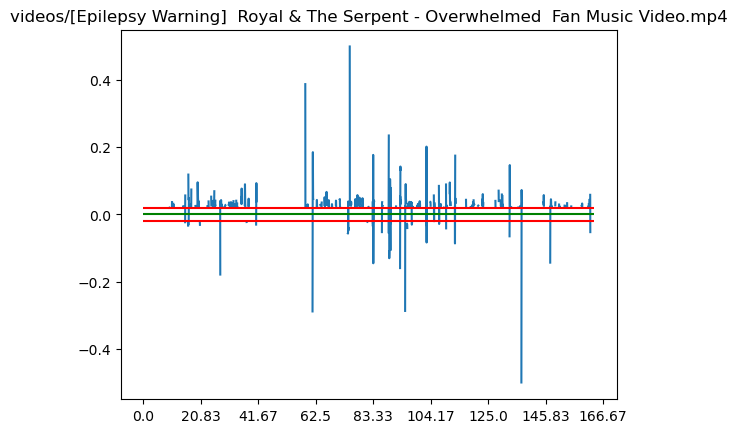

Video videos/Learn A To Z Insects For Kindergarten  A to Z  Learning Video  A To Z Reading  The Little Lumen.mp4 FPS: 25


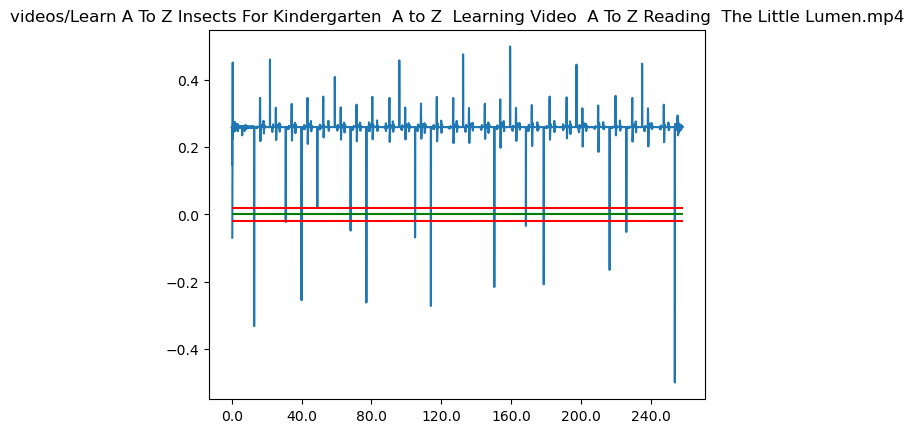

In [70]:
for f in filenames:
    
    vid, fps = VideoReader.get_vid(f, conversion=cv.COLOR_BGR2HLS)
    print(f'Video {f} FPS: {fps}')
    
    height = vid.shape[1]
    width = vid.shape[2]
    lightness_per_frame = vid.reshape(-1, 3)[:, 1].reshape((-1, height*width))
    av_lightness_per_frame = np.mean(lightness_per_frame,axis=1)
    ld = np.diff(av_lightness_per_frame, 1)
    minmax = (ld - ld.min())/(ld.max() - ld.min()) - 0.5

    threshold = 0.02
    zc = minmax.copy()
    zc = np.where(np.absolute(zc) < threshold, np.nan, zc)
    

    plot(zc)
    plt.title(f)
    plt.hlines(0, 0, len(zc) - 1, colors='green')
    plt.hlines(threshold, 0, len(zc) -1, colors='red')
    plt.hlines(0-(threshold), 0, len(zc) -1, colors='red')
    locs, labels = plt.xticks()
    plt.xticks(ticks = locs[1:-1], labels= np.around(locs[1:-1] / fps, 2))
    plt.show()

Check the graphs after applying `ffill` and `bfill`

Video safe_videos/LION MENTALITY - Motivational Video.mp4 FPS: 25


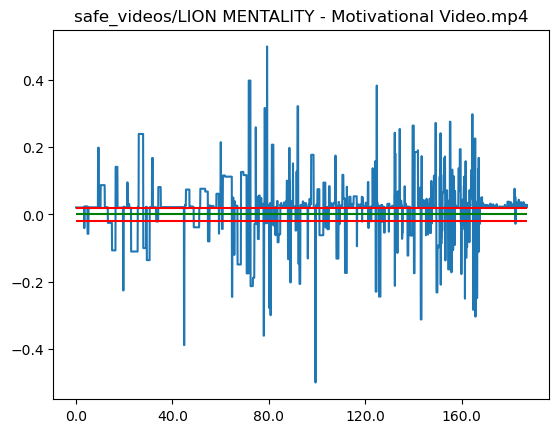

Video safe_videos/Motivational short video - How to succeed - cartoon.mp4 FPS: 30


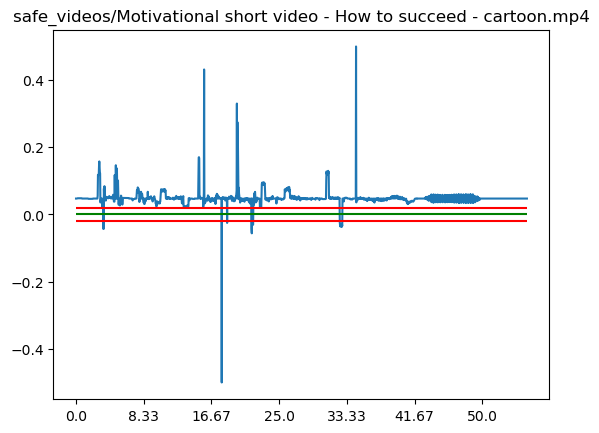

Video safe_videos/I Will Guess Your Name In One Minute!.mp4 FPS: 30


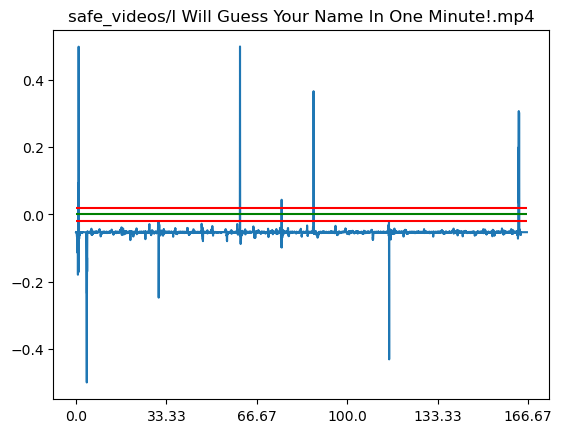

Video safe_videos/hitched - 2 Minute Short Film.mp4 FPS: 24


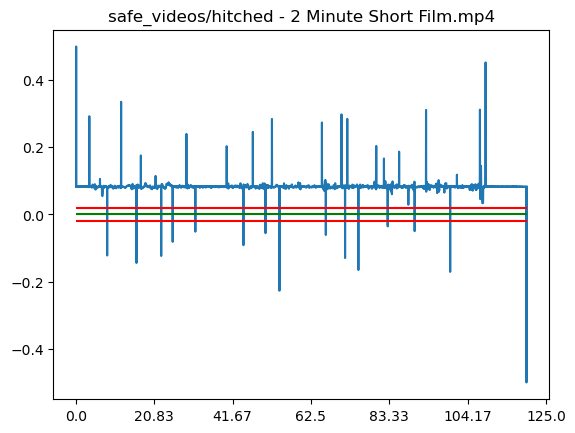

Video safe_videos/THE SEED  Inspirational Short Film.mp4 FPS: 24


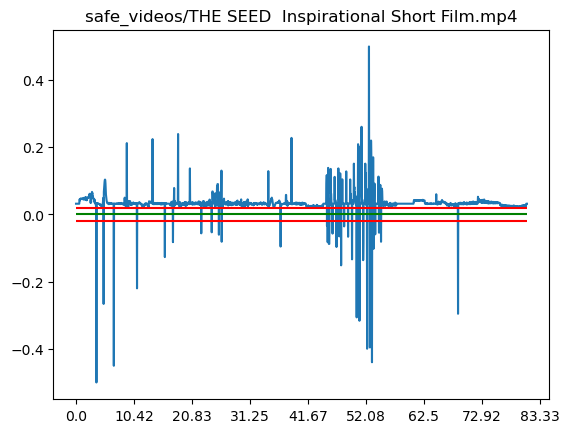

Video safe_videos/Disney Pixar Piper - Music by lewisjackmusic.mp4 FPS: 24


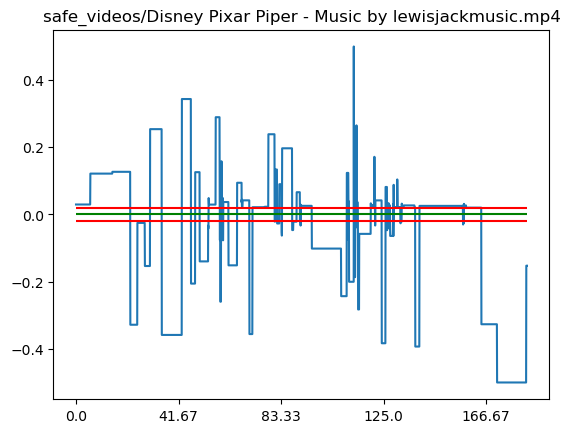

Video safe_videos/10 DAKİKADA BAZLAMA🔊İSTER KAHVALTIDA🔝İSTER ÇAY SAATİNDE🔝İSTER YEMEK YANINDA YE✌️YOK BÖYLE YUMUŞAKLIK.mp4 FPS: 30


/usr/local/Caskroom/mambaforge/base/envs/epilator/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/Caskroom/mambaforge/base/envs/epilator/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


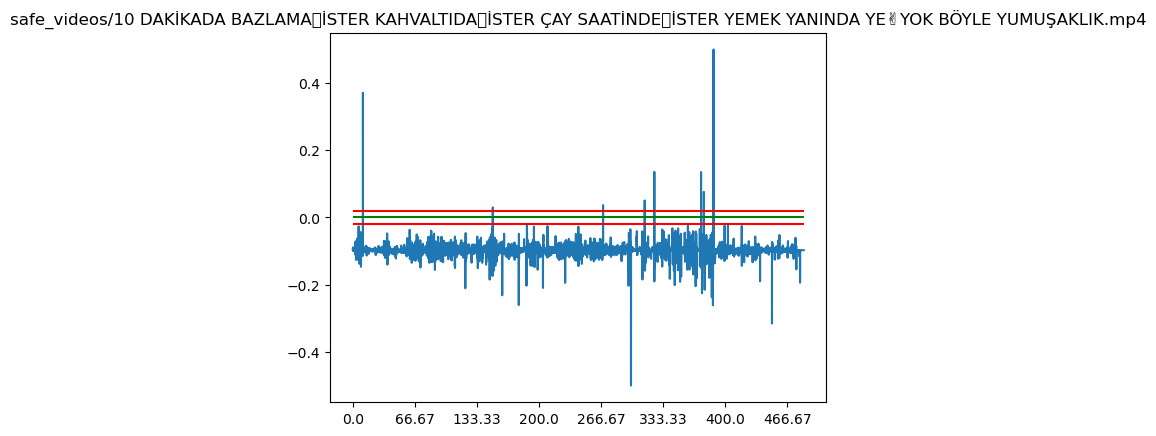

Video safe_videos/Funniest Cat Videos Compilation in 2 Minute.mp4 FPS: 25


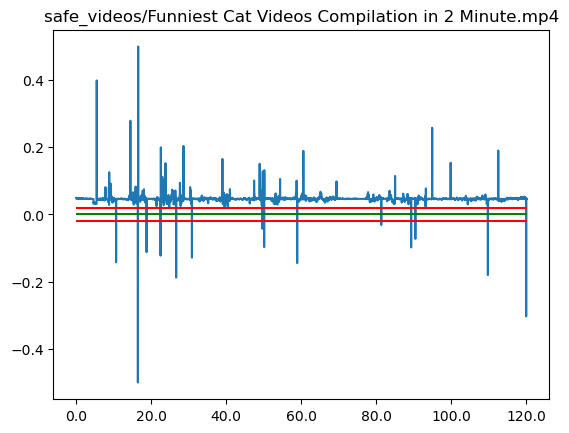

Video safe_videos/Best Short Motivational Speech Video - 24 HOURS - 1-Minute Motivation 2.mp4 FPS: 30


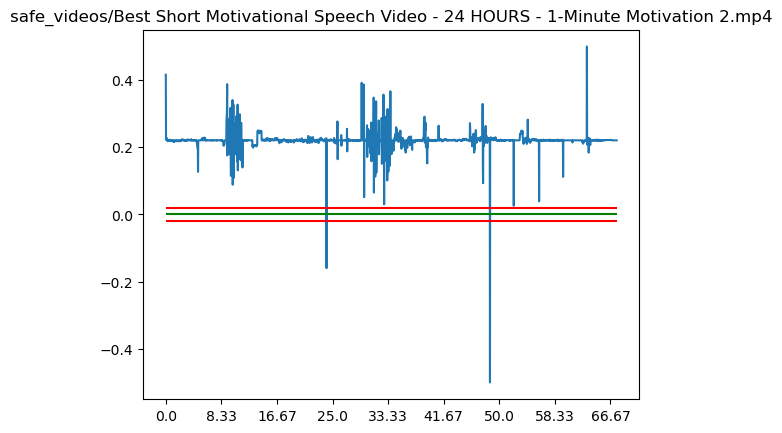

Video safe_videos/Cute Minutes - Two Minutes Funny Puppy Videos Compilation 1  FeenZoo.mp4 FPS: 24


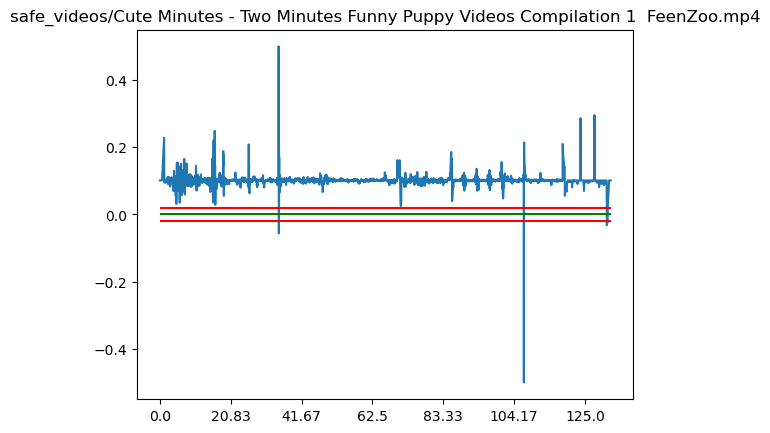

Video videos/Color Flash.mp4 FPS: 30


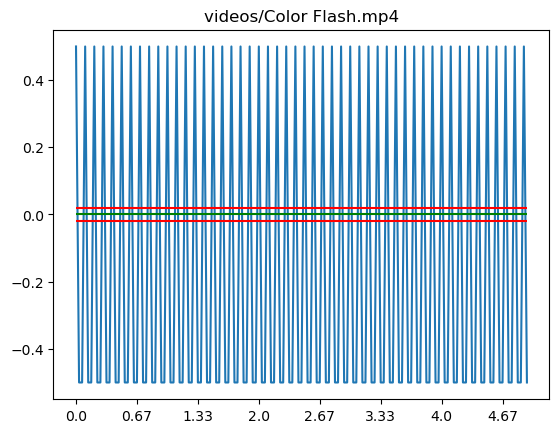

Video videos/Paparazzi flashes.mp4 FPS: 30


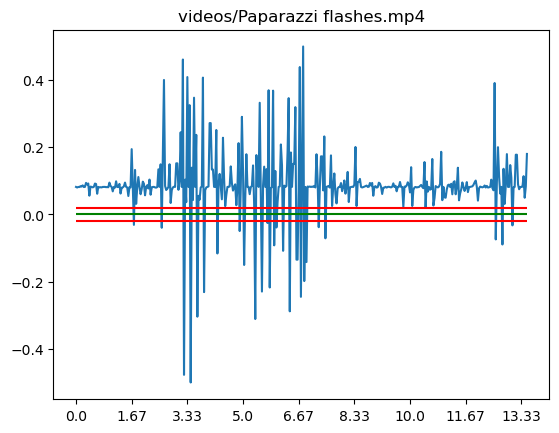

Video videos/Delete & Killshot - Disco Weapon [Epilepsy Warning].mp4 FPS: 30


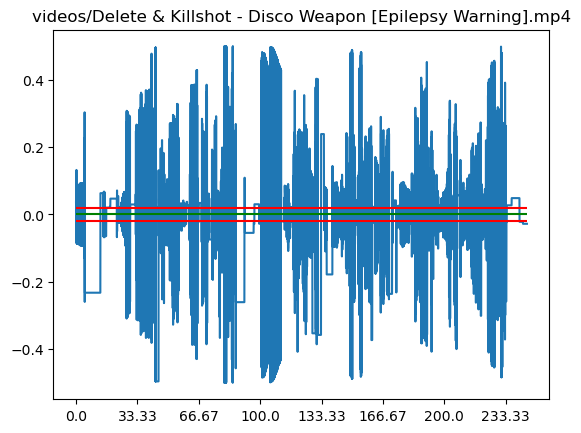

Video videos/Blue Green Flash.mp4 FPS: 30


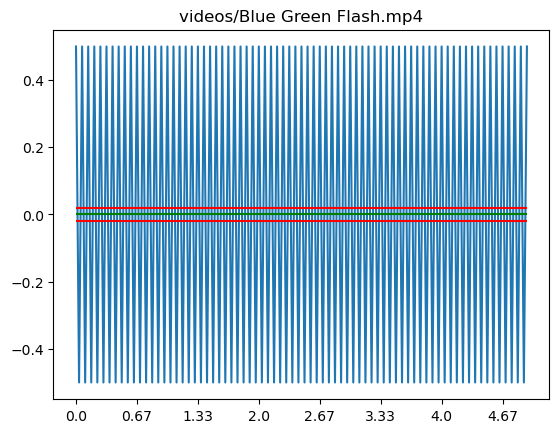

Video videos/little hens and dog.mp4 FPS: 30


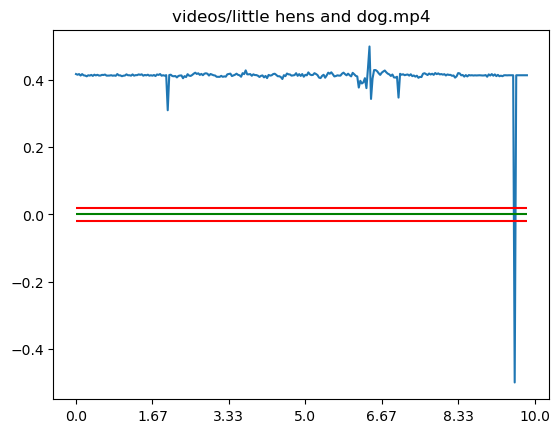

Video videos/Red Spin.mp4 FPS: 30


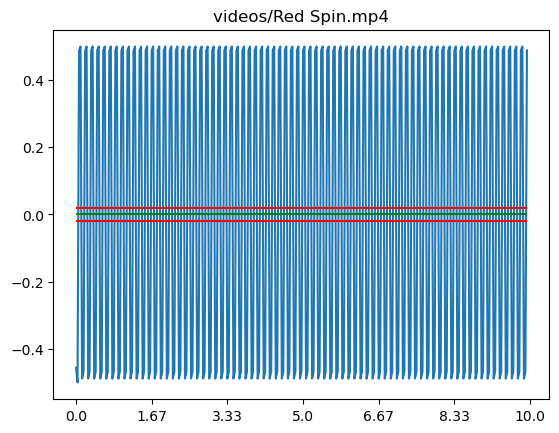

Video videos/Banned Pokemon Seizure Scene.mp4 FPS: 30


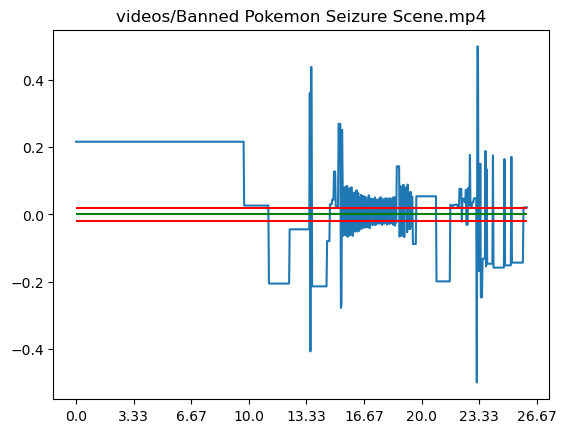

Video videos/Superman 80th Anniversary Animated Short  @dckids.mp4 FPS: 30


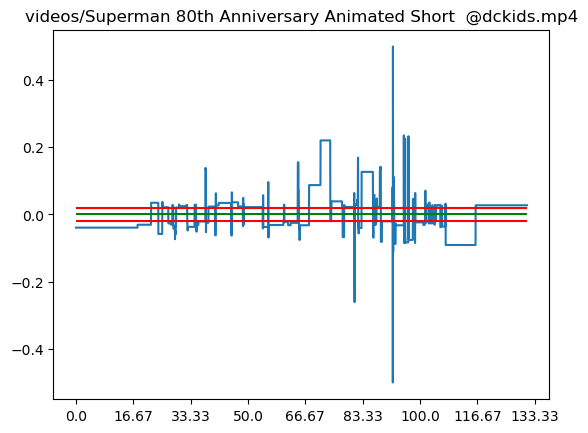

Video videos/Car flips over bridge following police pursuit.mp4 FPS: 30


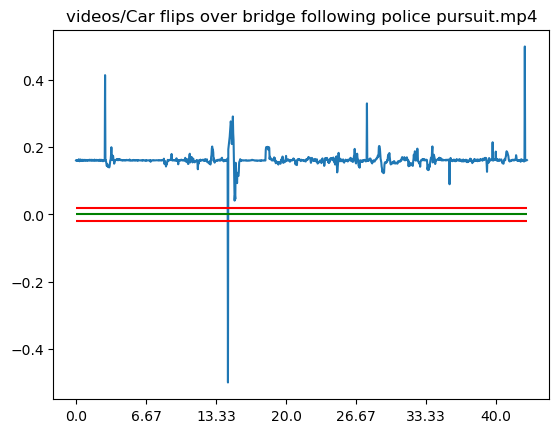

Video videos/Top 10 Dangerous Lightning Strikes Thunder recorded on Camera (HIGH VOLTAGE!!).mp4 FPS: 30


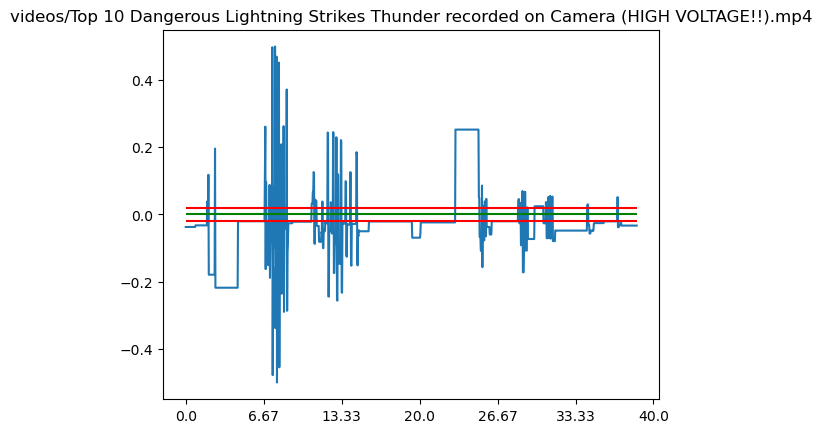

Video videos/MASSIVE gas factory explosion caught on camera!!.mp4 FPS: 30


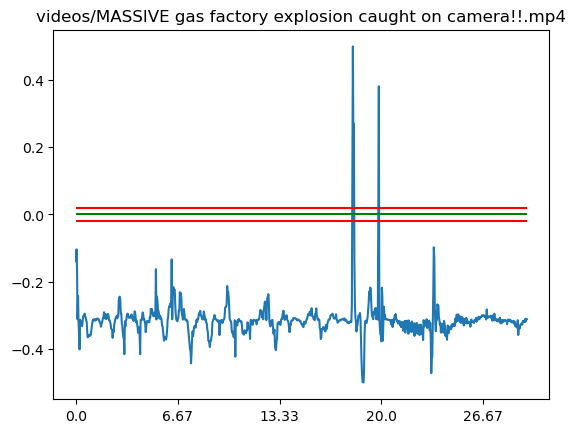

Video videos/Plant explosion caught on camera.mp4 FPS: 30


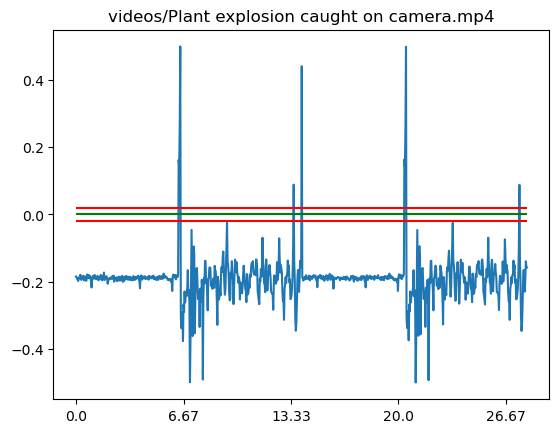

Video videos/Black White Flash.mp4 FPS: 30


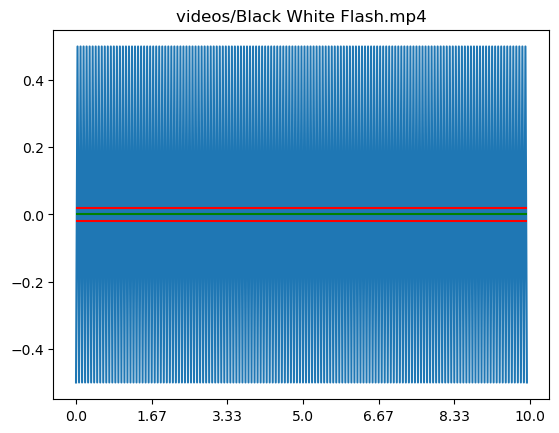

Video videos/Blue Green Fade.mp4 FPS: 30


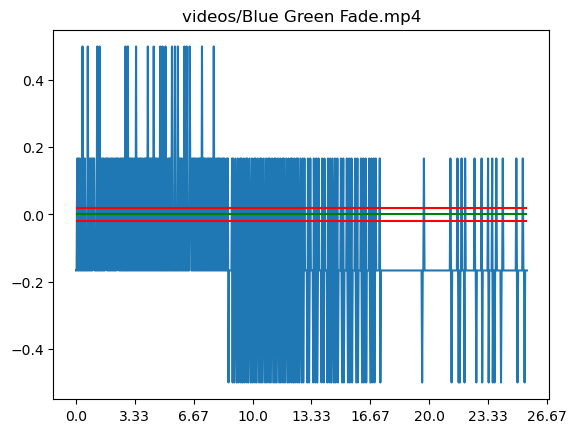

Video videos/W I L T Short Art Film by Anthony Petano  EPILEPSY WARNING.mp4 FPS: 24


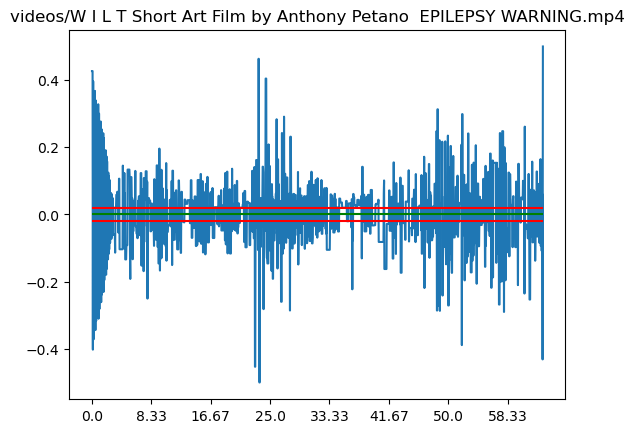

Video videos/Clutrrglych - •Ô•‘ [OFFICIAL MUSIC VIDEO] [PHOTOSENSITIVE EPILEPSY WARNING].mp4 FPS: 30


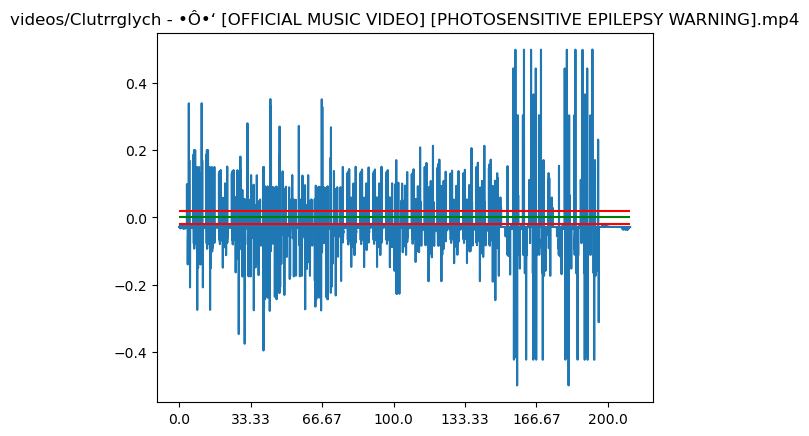

Video videos/video to induce seizures.mp4 FPS: 30


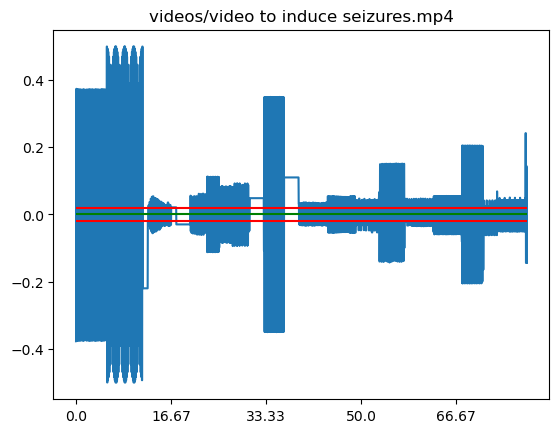

Video videos/Color Fade.mp4 FPS: 60


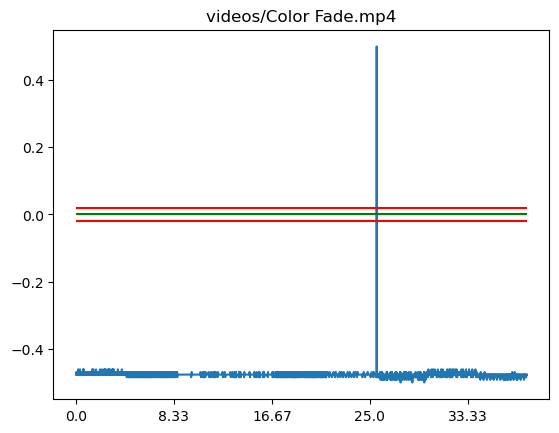

Video videos/[Epilepsy Warning]  Royal & The Serpent - Overwhelmed  Fan Music Video.mp4 FPS: 24


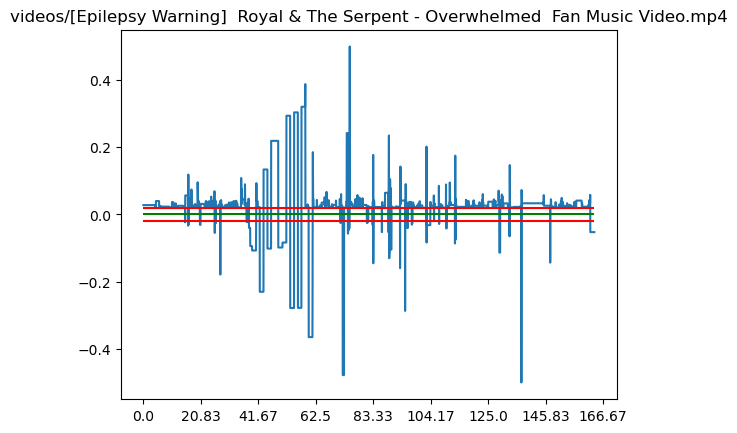

Video videos/Learn A To Z Insects For Kindergarten  A to Z  Learning Video  A To Z Reading  The Little Lumen.mp4 FPS: 25


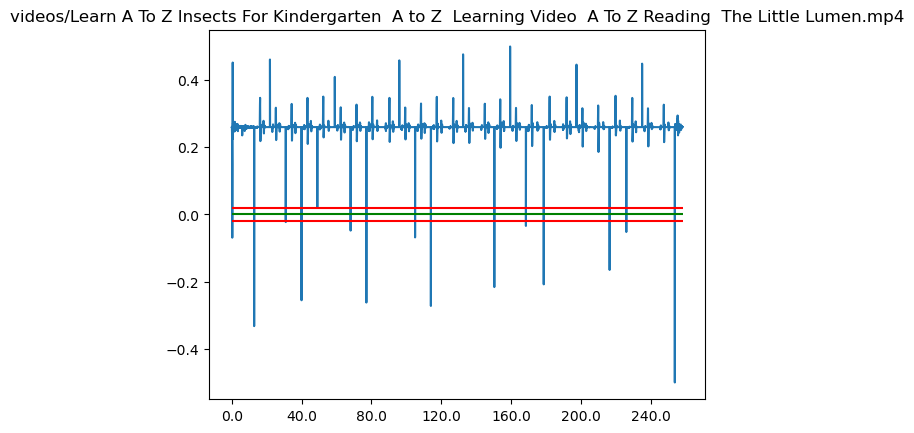

In [231]:
for f in filenames:
    
    vid, fps = VideoReader.get_vid(f, conversion=cv.COLOR_BGR2HLS)
    print(f'Video {f} FPS: {fps}')
    
    height = vid.shape[1]
    width = vid.shape[2]
    lightness_per_frame = vid.reshape(-1, 3)[:, 1].reshape((-1, height*width))
    av_lightness_per_frame = np.mean(lightness_per_frame,axis=1)
    ld = np.diff(av_lightness_per_frame, 1)
    minmax = (ld - ld.min())/(ld.max() - ld.min()) - 0.5

    threshold = 0.02
    zc = minmax.copy()
    zc = np.where(np.absolute(zc) < threshold, np.nan, zc)
    zc = ffill(zc)
    zc = bfill(zc)
    

    plot(zc)
    plt.title(f)
    plt.hlines(0, 0, len(zc) - 1, colors='green')
    plt.hlines(threshold, 0, len(zc) -1, colors='red')
    plt.hlines(0-(threshold), 0, len(zc) -1, colors='red')
    locs, labels = plt.xticks()
    plt.xticks(ticks = locs[1:-1], labels= np.around(locs[1:-1] / fps, 2))
    plt.show()